# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [913]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [914]:
#Code:
sat_2017 = pd.read_csv('data/sat_2017.csv')

In [915]:
act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [916]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [917]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The data gives us the averages on the subject test scores, as well as their participation rates for each state. There are 51 states in total. 

For SATs, students take 2 subjects: Evidence-Based Reading and Writing and Math. As for ACTS, students take 4 subjects: English, Math, Reading and Science. SAT and ACT are scored out of a total of 1600 and 36 respectively. Additionally, the ACT data has a composite score, which is the average of all the subjects for a given state. 


#### 4a. Does the data look complete? 

Answer: For SAT, the data could perhaps have included the national averages for each subject, like ACT scores. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
SAT: 0 - 800
ACT: 1 - 36

In [918]:
sat_2017.shape

(51, 5)

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [919]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [920]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [921]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:  
For SAT_2017, Participation Rates datatype should either be in float. As for ACT_2017, the participation and composite rates datatype have to be changed to float. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [922]:
#code
def float_convert(obj):
    new_str = ''
    
    if type(obj) == float or type(obj) ==int:
        return obj
    
    for i in range(len(obj)):
        try:
            if obj[i] == '.':
                new_str += obj[i]
            elif type(int(obj[i])) is int:
                new_str += obj[i]
        except:
            continue
    
    return float(new_str)

def percent_convert(x):
    return float(x.strip('%'))/100

k = '20%'
percent_convert(k)

0.2

- Fix any individual values preventing other columns from being the appropriate type.

In [923]:
#With regards to Maryland SAT Math Scores, there seems to be an error, where the score is only at 52. 
#Numbers do not add up to the total of 1060. By deduction, the Math score should be 1060 - 536 = 524
sat_2017.loc[(sat_2017['State'] == 'Maryland')]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [924]:
sat_2017.loc[20, 'Math'] = 524
sat_2017.loc[(sat_2017['State'] == 'Maryland')]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [925]:
#With regards to Maryland ACT Science Scores, there seems to be an error, where the score is only at 2.3. 
#Numbers do not tabulate to the composite score of 23.6. An approximate deduction of the science score would be 23.6*4 - (23.3 + 23.1 + 24.2) = 23.8
act_2017.loc[(act_2017['State'] == 'Maryland')]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [926]:
act_2017.loc[21, 'Science'] = 23.8
act_2017.loc[(act_2017['State'] == 'Maryland')]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.8,23.6


In [927]:
#There seems to be some extra letters that have been mixed with the numbers in the sat_2017.csv file. 
act_2017['Composite'] = act_2017['Composite'].apply(float_convert)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [928]:
#code
sat_2017['Participation'] = sat_2017['Participation'].apply(percent_convert)

In [929]:
act_2017['Participation'] = act_2017['Participation'].apply(percent_convert)

- Display the data types again to confirm they are correct.

In [930]:
#Code:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [931]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [932]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [933]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [934]:
#code
sat_2017 = sat_2017.rename(columns={"Participation": "SAT_Participation_2017","Evidence-Based Reading and Writing":"SAT_R&W_2017","Math":"SAT_Math_2017", "Total": "SAT_Total_2017"})
sat_2017.head()

,State,SAT_Participation_2017,SAT_R&W_2017,SAT_Math_2017,SAT_Total_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [935]:
act_2017 = act_2017.rename(columns={"Participation": "ACT_Participation_2017", "English":"ACT_English_2017","Math":"ACT_Math_2017","Reading":"ACT_Reading_2017","Science":"ACT_Science_2017","Composite": "ACT_Composite_2017"})
act_2017.head()

,State,ACT_Participation_2017,ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|                      Feature                      |   Type   | Dataset | Description                                                  |
| :-----------------------------------------------: | :------: | :-----: | :----------------------------------------------------------- |
|                     **State**                     | *object* | SAT/ACT | States in the United States of America.                   |
   | **SAT_Participation_2017, SAT_Participation_2018** | *float*  |   SAT   | SAT participation rate 
| **SAT_R&W_2017**, **SAT_R&W_2018**  | *int*  |   SAT   | Average scores by state for the SAT subject of Evidence Based Reading and Writing 
| **SAT_Math_2017**, **SAT_Math_2018**  | *int*  |   SAT   | Average scores by state for the SAT Math subject 
| **SAT_Total_2017**, **SAT_Total_2018**  | *int*  |   SAT   | Average Total scores (from 400 to 1600) by state  
| **ACT_Participation_2017, ACT_Participation_2018** | *float*  |   ACT   | ACT participation rate 
| **ACT_English_2017**, **ACT_English_2018**  | *float*  |   ACT   | Average scores by state for the ACT English subject 
| **ACT_Math_2017**, **ACT_Math_2018**  | *float*  |   ACT   | Average scores by state for the ACT Math subject 
| **ACT_Reading_2017**, **ACT_Reading_2018**  | *float*  |   ACT   | Average scores by state for ACT the Reading subject 
| **ACT_Science_2017**, **ACT_Science_2018**  | *float*  |   ACT   | Average scores by state for the ACT Science subject 
| **ACT_Composite_2017**, **ACT_Composite_2018**  | *float*  |   ACT   | Average ACT Composite scores (from 1 to 36) by state 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [936]:
#In the ACT 2017 Dataframe, The first row consists of National Averages for Test Subjects. It will be omitted in this case because we would want to focus on state averages first
act_2017 = act_2017.drop([0])
act_2017 = act_2017.reset_index().drop(columns = ['index'])
act_2017.head()

,State,ACT_Participation_2017,ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [937]:
#Code:
act_sat_2017 = pd.concat([act_2017,sat_2017],axis=1)
act_sat_2017 = act_sat_2017.loc[:,~act_sat_2017.columns.duplicated()]
act_sat_2017.head()

,State,ACT_Participation_2017,ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017,SAT_R&W_2017,SAT_Math_2017,SAT_Total_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [938]:
#code
act_sat_2017.to_csv('combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [939]:
sat_2018 = pd.read_csv('data/sat_2018.csv')
act_2018 = pd.read_csv('data/act_2018_updated.csv')

In [940]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [941]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [942]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [943]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [944]:
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].apply(lambda x:x/100)

In [945]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [946]:
act_2018 = act_2018[['State','Percentage of Students Tested','Average English Score','Average Math Score','Average Reading Score','Average Science Score','Average Composite Score']]

In [947]:
act_2018.head()

,State,Percentage of Students Tested,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [948]:
sat_2018['Participation'] = sat_2018['Participation'].apply(percent_convert)

In [949]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [950]:
act_2018 = act_2018.rename(columns={"Percentage of Students Tested": "ACT_Participation_2018", "Average English Score":"ACT_English_2018","Average Math Score":"ACT_Math_2018","Average Reading Score":"ACT_Reading_2018","Average Science Score":"ACT_Science_2018","Average Composite Score": "ACT_Composite_2018"})
act_2018.head()

,State,ACT_Participation_2018,ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [951]:
sat_2018 = sat_2018.rename(columns={"Participation": "SAT_Participation_2018","Evidence-Based Reading and Writing":"SAT_R&W_2018","Math":"SAT_Math_2018", "Total": "SAT_Total_2018"})
sat_2018.head()

,State,SAT_Participation_2018,SAT_R&W_2018,SAT_Math_2018,SAT_Total_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [952]:
act_sat_2018 = pd.concat([act_2018,sat_2018],axis=1)
act_sat_2018 = act_sat_2018.loc[:,~act_sat_2018.columns.duplicated()]
act_sat_2018.head()

,State,ACT_Participation_2018,ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018,SAT_R&W_2018,SAT_Math_2018,SAT_Total_2018
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [953]:
combined_2017 = pd.read_csv('combined_2017.csv')
combined_2017_2018 = pd.concat([combined_2017,act_sat_2018],axis=1)
combined_2017_2018 = combined_2017_2018.loc[:,~combined_2017_2018.columns.duplicated()]
combined_2017_2018.head()

,State,ACT_Participation_2017,ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017,SAT_R&W_2017,SAT_Math_2017,...,ACT_Participation_2018,ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018,SAT_R&W_2018,SAT_Math_2018,SAT_Total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [954]:
#Final Combined Dataframe - ACT and SAT for 2017/2018
combined_2017_2018.to_csv('final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [955]:
#Code:
final = pd.read_csv('final.csv')
final.describe()

,ACT_Participation_2017,ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017,SAT_R&W_2017,SAT_Math_2017,SAT_Total_2017,ACT_Participation_2018,ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018,SAT_R&W_2018,SAT_Math_2018,SAT_Total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.462745,21.519608,0.398039,569.117647,556.882353,1126.098039,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.753392,2.020695,0.352766,45.666901,47.121395,92.494812,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [956]:
#code
def std_dev(data):
    
    total = 0
    summ = 0
    
    for i in data:
        total += i
    
    mean = total/len(data)
    
    for j in data:
        summ += (j - mean)**2 
        
    sigma = (summ/len(data))**0.5
    
    return sigma


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [957]:
final.head()

,State,ACT_Participation_2017,ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017,SAT_R&W_2017,SAT_Math_2017,...,ACT_Participation_2018,ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018,SAT_R&W_2018,SAT_Math_2018,SAT_Total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [958]:
#Code:
std_dev_dict = {column.name:std_dev(column) for column in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}
std_dev_dict

{'ACT_Participation_2017': 0.3182417575123181,
 'ACT_English_2017': 2.3304876369363363,
 'ACT_Math_2017': 1.9624620273436781,
 'ACT_Reading_2017': 2.0469029314842646,
 'ACT_Science_2017': 1.7361170088327353,
 'ACT_Composite_2017': 2.000786081581989,
 'SAT_Participation_2017': 0.3492907076664507,
 'SAT_R&W_2017': 45.21697020437866,
 'SAT_Math_2017': 46.65713364485503,
 'SAT_Total_2017': 91.58351056778743,
 'ACT_Participation_2018': 0.33745194881997503,
 'ACT_English_2018': 2.4222536143202795,
 'ACT_Math_2018': 2.015707255555717,
 'ACT_Reading_2018': 2.145891884510421,
 'ACT_Science_2018': 1.8516885484833543,
 'ACT_Composite_2018': 2.0855261815801147,
 'SAT_Participation_2018': 0.3694661922353942,
 'SAT_R&W_2018': 47.03460978357609,
 'SAT_Math_2018': 47.30194550378352,
 'SAT_Total_2018': 93.22742384464433}

In [959]:
np.std_dict = {column.name:np.std(column) for column in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}
np.std_dict 

{'ACT_Participation_2017': 0.3182417575123181,
 'ACT_English_2017': 2.3304876369363363,
 'ACT_Math_2017': 1.9624620273436781,
 'ACT_Reading_2017': 2.0469029314842646,
 'ACT_Science_2017': 1.7361170088327353,
 'ACT_Composite_2017': 2.000786081581989,
 'SAT_Participation_2017': 0.3492907076664507,
 'SAT_R&W_2017': 45.21697020437866,
 'SAT_Math_2017': 46.65713364485503,
 'SAT_Total_2017': 91.58351056778743,
 'ACT_Participation_2018': 0.33745194881997503,
 'ACT_English_2018': 2.4222536143202795,
 'ACT_Math_2018': 2.015707255555717,
 'ACT_Reading_2018': 2.145891884510421,
 'ACT_Science_2018': 1.8516885484833543,
 'ACT_Composite_2018': 2.0855261815801147,
 'SAT_Participation_2018': 0.3694661922353942,
 'SAT_R&W_2018': 47.03460978357609,
 'SAT_Math_2018': 47.30194550378352,
 'SAT_Total_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: 
No, the manually calculated standard deviations are slightly off by a few decimal places. However, the output from the numpy std method is exactly the same. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [960]:
#Highest Participation Rates - SAT 2017 
sat_2017_highestpart = final[['State','SAT_Participation_2017']]
sat_2017_highestpart.sort_values(['SAT_Participation_2017'],ascending = False).head()


,State,SAT_Participation_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


**States with highest SAT Participation rates in 2017:**  
District of Columbia - 100%  
Michigan - 100%  
Connecticut - 100%  
Delaware - 100%

In [961]:
#Lowest Participation Rates - SAT 2017 
sat_2017_lowestpart = final[['State','SAT_Participation_2017']]
sat_2017_lowestpart.sort_values(['SAT_Participation_2017']).head()

,State,SAT_Participation_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


**States with lowest SAT Participation rates in 2017:**  
North Dakota - 2%  
Mississippi	 - 2%  
Iowa - 2%  


In [962]:
#Highest Participation Rates - SAT 2018
sat_2018_highestpart = final[['State','SAT_Participation_2018']]
sat_2018_highestpart.sort_values(['SAT_Participation_2018'],ascending = False).head(6)


,State,SAT_Participation_2018
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99


**States with highest SAT Participation rates in 2018:**  
Colorado - 100%  
Michigan - 100%  
Connecticut - 100%  
Delaware - 100%  
Idaho - 100%

In [963]:
#Lowest Participation Rates - SAT 2018 
sat_2018_lowestpart = final[['State','SAT_Participation_2018']]
sat_2018_lowestpart.sort_values(['SAT_Participation_2018']).head()


,State,SAT_Participation_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


**States with lowest SAT Participation rates in 2018:**  
North Dakota - 2% 

In [964]:
#Highest Participation Rates - ACT 2017 
act_2017_highestpart = final[['State','ACT_Participation_2017']]
act_2017_highestpart.sort_values(['ACT_Participation_2017'],ascending = False).head(20)

,State,ACT_Participation_2017
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


**States with highest ACT Participation rates in 2017:**  
Alabama	- 100%,
Kentucky - 100%,
Wisconsin - 100%,
Utah - 100%,
Tennessee - 100%,
South Carolina - 100%,
Oklahoma - 100%,
North Carolina - 100%,
Nevada - 100%,
Montana - 100%,
Mississippi - 100%,
Minnesota - 100%,
Louisiana - 100%,
Missouri - 100%,
Wyoming - 100%,
Colorado - 100%,  
Arkansas - 100%

In [965]:
#Lowest Participation Rates - ACT 2017 
sat_2017_lowestpart = final[['State','ACT_Participation_2017']]
sat_2017_lowestpart.sort_values(['ACT_Participation_2017']).head()

,State,ACT_Participation_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


**States with lowest ACT Participation rates in 2017:**  
Maine - 8% 

In [966]:
#Highest Participation Rates - ACT 2018 
act_2017_highestpart = final[['State','ACT_Participation_2018']]
act_2017_highestpart.sort_values(['ACT_Participation_2018'],ascending = False).head(20)

,State,ACT_Participation_2018
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


**States with highest ACT Participation rates in 2018:**  
Alabama - 100%,
Kentucky - 100%,
Wisconsin - 100%,
Utah - 100%,
Tennessee - 100%,
South Carolina - 100%,
Oklahoma - 100%,
Ohio - 100%,
North Carolina - 100%,
Nevada - 100%,
Nebraska - 100%,
Montana - 100%,
Mississippi - 100%,
Louisiana - 100%,
Missouri - 100%,
Wyoming - 100%,  
Arkansas - 100%

In [967]:
#Lowest Participation Rates - ACT 2018
sat_2017_lowestpart = final[['State','ACT_Participation_2018']]
sat_2017_lowestpart.sort_values(['ACT_Participation_2018']).head()

,State,ACT_Participation_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


**States with lowest ACT Participation rates in 2018:**  
Maine - 7% 

In [968]:
#Highest Mean Total Score - SAT 2017 
sat_2017_highest_total = final[['State','SAT_Total_2017']]
sat_2017_highest_total.sort_values(['SAT_Total_2017'],ascending = False).head()


,State,SAT_Total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


**State with highest SAT Mean Total Score in 2017:**  
Minnesota - 1295

In [969]:
#Lowest Total Mean Score - SAT 2017 
sat_2017_lowest_total = final[['State','SAT_Total_2017']]
sat_2017_lowest_total.sort_values(['SAT_Total_2017']).head()


,State,SAT_Total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


**State with lowest SAT Mean Total Score in 2017:**  
District of Columbia - 950

In [970]:
#Highest Mean Total Score - SAT 2018 
sat_2018_highest_total = final[['State','SAT_Total_2018']]
sat_2018_highest_total.sort_values(['SAT_Total_2018'],ascending = False).head()

,State,SAT_Total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


**State with highest SAT Mean Total Score in 2018:**  
Minnesota - 1298

In [971]:
#Lowest Total Mean Score - SAT 2018 
sat_2018_lowest_total = final[['State','SAT_Total_2018']]
sat_2018_lowest_total.sort_values(['SAT_Total_2018']).head()

,State,SAT_Total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


**State with lowest SAT Mean Total Score in 2018:**  
District of Columbia - 977

In [972]:
#Highest Mean Composite Score - ACT 2017 
act_2017_highest_comp = final[['State','ACT_Composite_2017']]
act_2017_highest_comp.sort_values(['ACT_Composite_2017'],ascending = False).head()

,State,ACT_Composite_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


**State with highest ACT Mean Composite Score in 2017:**  
New Hampshire - 25.5

In [973]:
#Lowest Mean Composite Rates - ACT 2017 
act_2017_lowestpart = final[['State','ACT_Composite_2017']]
act_2017_lowestpart.sort_values(['ACT_Composite_2017']).head()

,State,ACT_Composite_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


**State with lowest ACT Mean Composite Score in 2017:**  
Nevada - 17.8

In [974]:
#Highest Mean Composite Score - ACT 2018 
act_2018_highest_comp = final[['State','ACT_Composite_2018']]
act_2018_highest_comp.sort_values(['ACT_Composite_2018'],ascending = False).head()

,State,ACT_Composite_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


**State with highest ACT Mean Composite Score in 2018:**  
Connecticut - 25.6

In [975]:
#Lowest Mean Composite Rates - ACT 2018 
act_2018_lowestpart = final[['State','ACT_Composite_2018']]
act_2018_lowestpart.sort_values(['ACT_Composite_2018']).head()

,State,ACT_Composite_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


**State with lowest ACT Mean Composite Score in 2018:**  
Nevada - 17.7

Do any states with 100% participation on a given test have a rate change year-to-year?
Do any states show have >50% participation on both tests either year?
Based on what you've just observed, have you identified any states that you're especially interested in? Make a note of these and state why you think they're interesting.

You should comment on your findings at each step in a markdown cell below your code block. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [976]:
# SAT Participation Rates Change YoY:

final.loc[(final['SAT_Participation_2017']== 1),['State','SAT_Participation_2017','SAT_Participation_2018']]

,State,SAT_Participation_2017,SAT_Participation_2018
6,Connecticut,1.0,1.00
7,Delaware,1.0,1.00
8,District of Columbia,1.0,0.92
22,Michigan,1.0,1.00


In [977]:
# ACT Participation Rates Change YoY:

final.loc[(final['ACT_Participation_2017']== 1),['State','ACT_Participation_2017','ACT_Participation_2018']]

,State,ACT_Participation_2017,ACT_Participation_2018
0,Alabama,1.0,1.00
3,Arkansas,1.0,1.00
5,Colorado,1.0,0.30
17,Kentucky,1.0,1.00
18,Louisiana,1.0,1.00
23,Minnesota,1.0,0.99
24,Mississippi,1.0,1.00
25,Missouri,1.0,1.00
26,Montana,1.0,1.00
28,Nevada,1.0,1.00


**Do any states with 100% participation on a given test have a rate change year-to-year?**  

For SAT Participation Rates, out of the 4 states which have 100% participation, only District of Columbia registered an 8% drop in participation as compared to the previous year.  
  
For ACT Participation Rates, from a total of 17 states, Colorado and Minnesota registered drops in their participation of 70% and 1% respectively. 

In [978]:
# SAT/ACT Participation Rates 2017:
final.loc[(final['SAT_Participation_2017'] > 0.5) & (final['ACT_Participation_2017'] > 0.5),['State','SAT_Participation_2017','ACT_Participation_2017']]

,State,SAT_Participation_2017,ACT_Participation_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [979]:
#Do any states show have >50% participation on both tests either year?
# SAT/ACT Participation Rates 2018:
final.loc[(final['SAT_Participation_2018'] > 0.5) & (final['ACT_Participation_2018'] > 0.5),['State','SAT_Participation_2018','ACT_Participation_2018']]

,State,SAT_Participation_2018,ACT_Participation_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


**Do any states show have >50% participation on both tests either year?**  
  
For the year 2017, 3 states have registered >50% participation rates for both tests:  
Florida, Georgia and Hawaii  
  
For the year 2018, 5 states have registered >50% participation rates for both tests:  
Florida, Georgia, Hawaii, North Carolina and South Carolina  

**Based on what you've just observed, have you identified any states that you're especially interested in?**  
  
It is interesting to note that Colorado has registered drastic changes in its participation rates for both tests. In Colorado, its SAT participation rate increased from 11% to 100%, whereas ACT participation rate has dropped from 100% to 70%. 

From my preliminary reseach, it has been found that the Colorado State Department of Education has instead partnered with the College Board, whom are the makers of SAT as opposed to ACT Testing company. This is due to a change which "grew out of a competitive bidding process required by hard-fought testing reform legislation."

Sources:  
https://www.testive.com/colorado-sat-change-2017/  
https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/

In [980]:
final.loc[(final['State'] == 'Colorado'),['State','SAT_Participation_2017','SAT_Participation_2018','ACT_Participation_2017','ACT_Participation_2018']]

,State,SAT_Participation_2017,SAT_Participation_2018,ACT_Participation_2017,ACT_Participation_2018
5,Colorado,0.11,1.0,1.0,0.3


In [981]:
final[['State','SAT_Participation_2017','SAT_Participation_2018','ACT_Participation_2017','ACT_Participation_2018']]

,State,SAT_Participation_2017,SAT_Participation_2018,ACT_Participation_2017,ACT_Participation_2018
0,Alabama,0.05,0.06,1.00,1.00
1,Alaska,0.38,0.43,0.65,0.33
2,Arizona,0.30,0.29,0.62,0.66
3,Arkansas,0.03,0.05,1.00,1.00
4,California,0.53,0.60,0.31,0.27
5,Colorado,0.11,1.00,1.00,0.30
6,Connecticut,1.00,1.00,0.31,0.26
7,Delaware,1.00,1.00,0.18,0.17
8,District of Columbia,1.00,0.92,0.32,0.32
9,Florida,0.83,0.56,0.73,0.66


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

(20.0, 0.0)

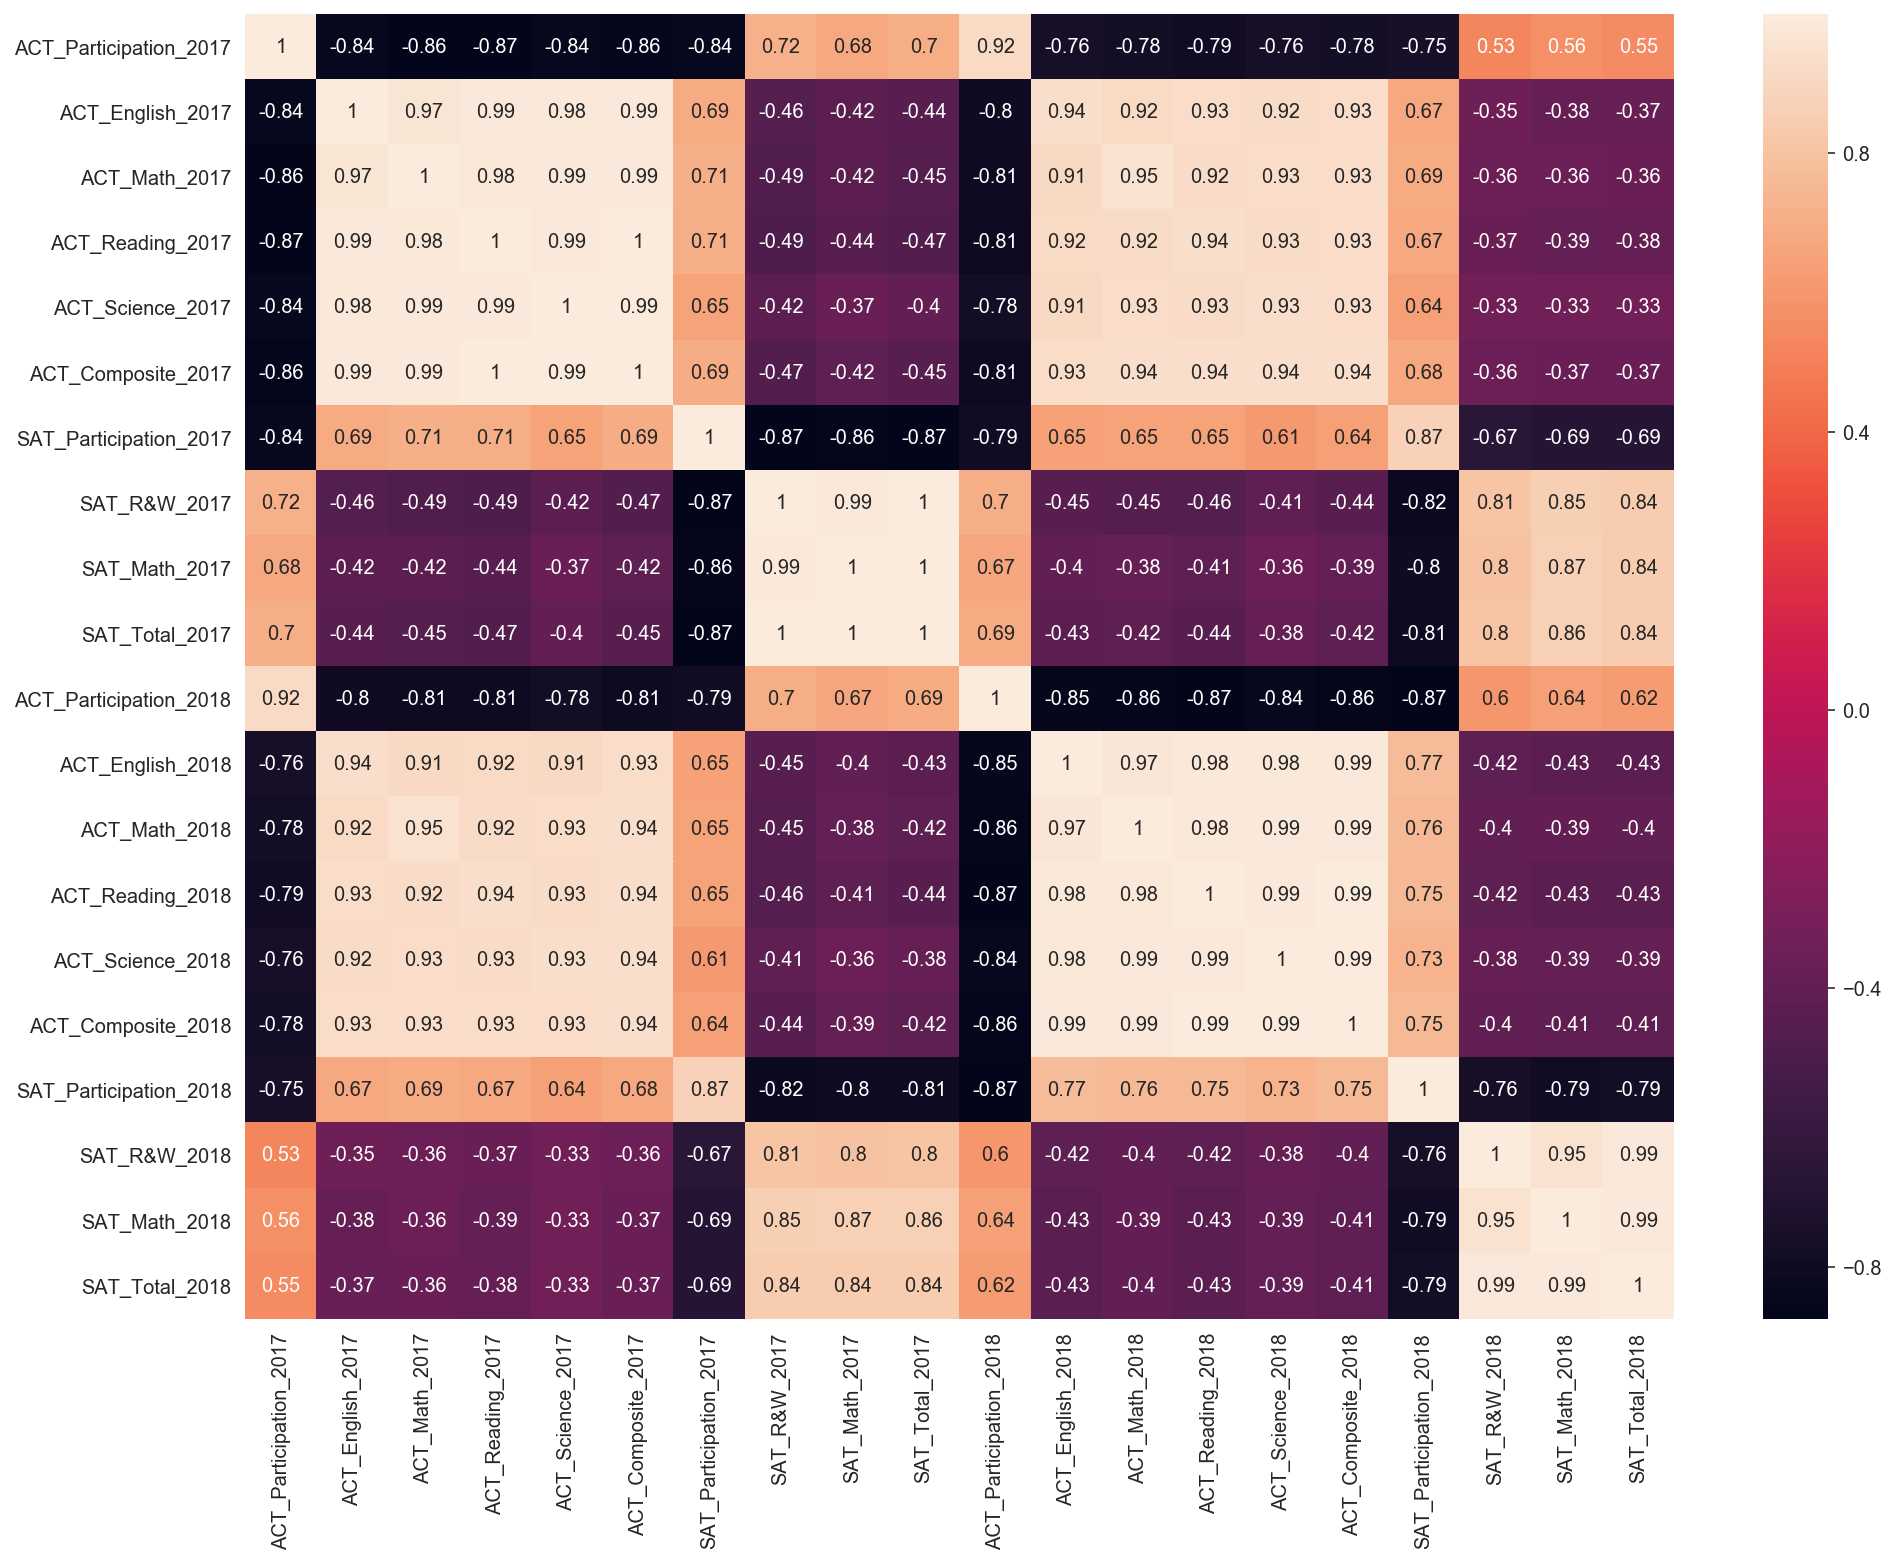

In [982]:
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(final.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [983]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,list_of_ylabels, supertitle): 
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=10) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize = 16)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 16)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 16)
        
    for ax in ax.flat:
        ax.label_outer()
        
    plt.tight_layout()

    fig.suptitle(supertitle, fontsize = 28, fontweight=20,y=1.05)
    
    return plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [984]:
['ACT_Participation_2017','SAT_English_2017','ACT_Math_2017','ACT_Reading_2017','ACT_Science_2017','ACT_Composite_2017','SAT_Participation_2017',
 'SAT_R&W_2017','SAT_Math_2017','SAT_Total_2017','ACT_Participation_2018','SAT_English_2018','ACT_Math_2018','ACT_Reading_2018','ACT_Science_2018',
 'ACT_Composite_2018','SAT_Participation_2018','SAT_R&W_2018','SAT_Math_2018','SAT_Total_2018']

['ACT_Participation_2017',
 'SAT_English_2017',
 'ACT_Math_2017',
 'ACT_Reading_2017',
 'ACT_Science_2017',
 'ACT_Composite_2017',
 'SAT_Participation_2017',
 'SAT_R&W_2017',
 'SAT_Math_2017',
 'SAT_Total_2017',
 'ACT_Participation_2018',
 'SAT_English_2018',
 'ACT_Math_2018',
 'ACT_Reading_2018',
 'ACT_Science_2018',
 'ACT_Composite_2018',
 'SAT_Participation_2018',
 'SAT_R&W_2018',
 'SAT_Math_2018',
 'SAT_Total_2018']

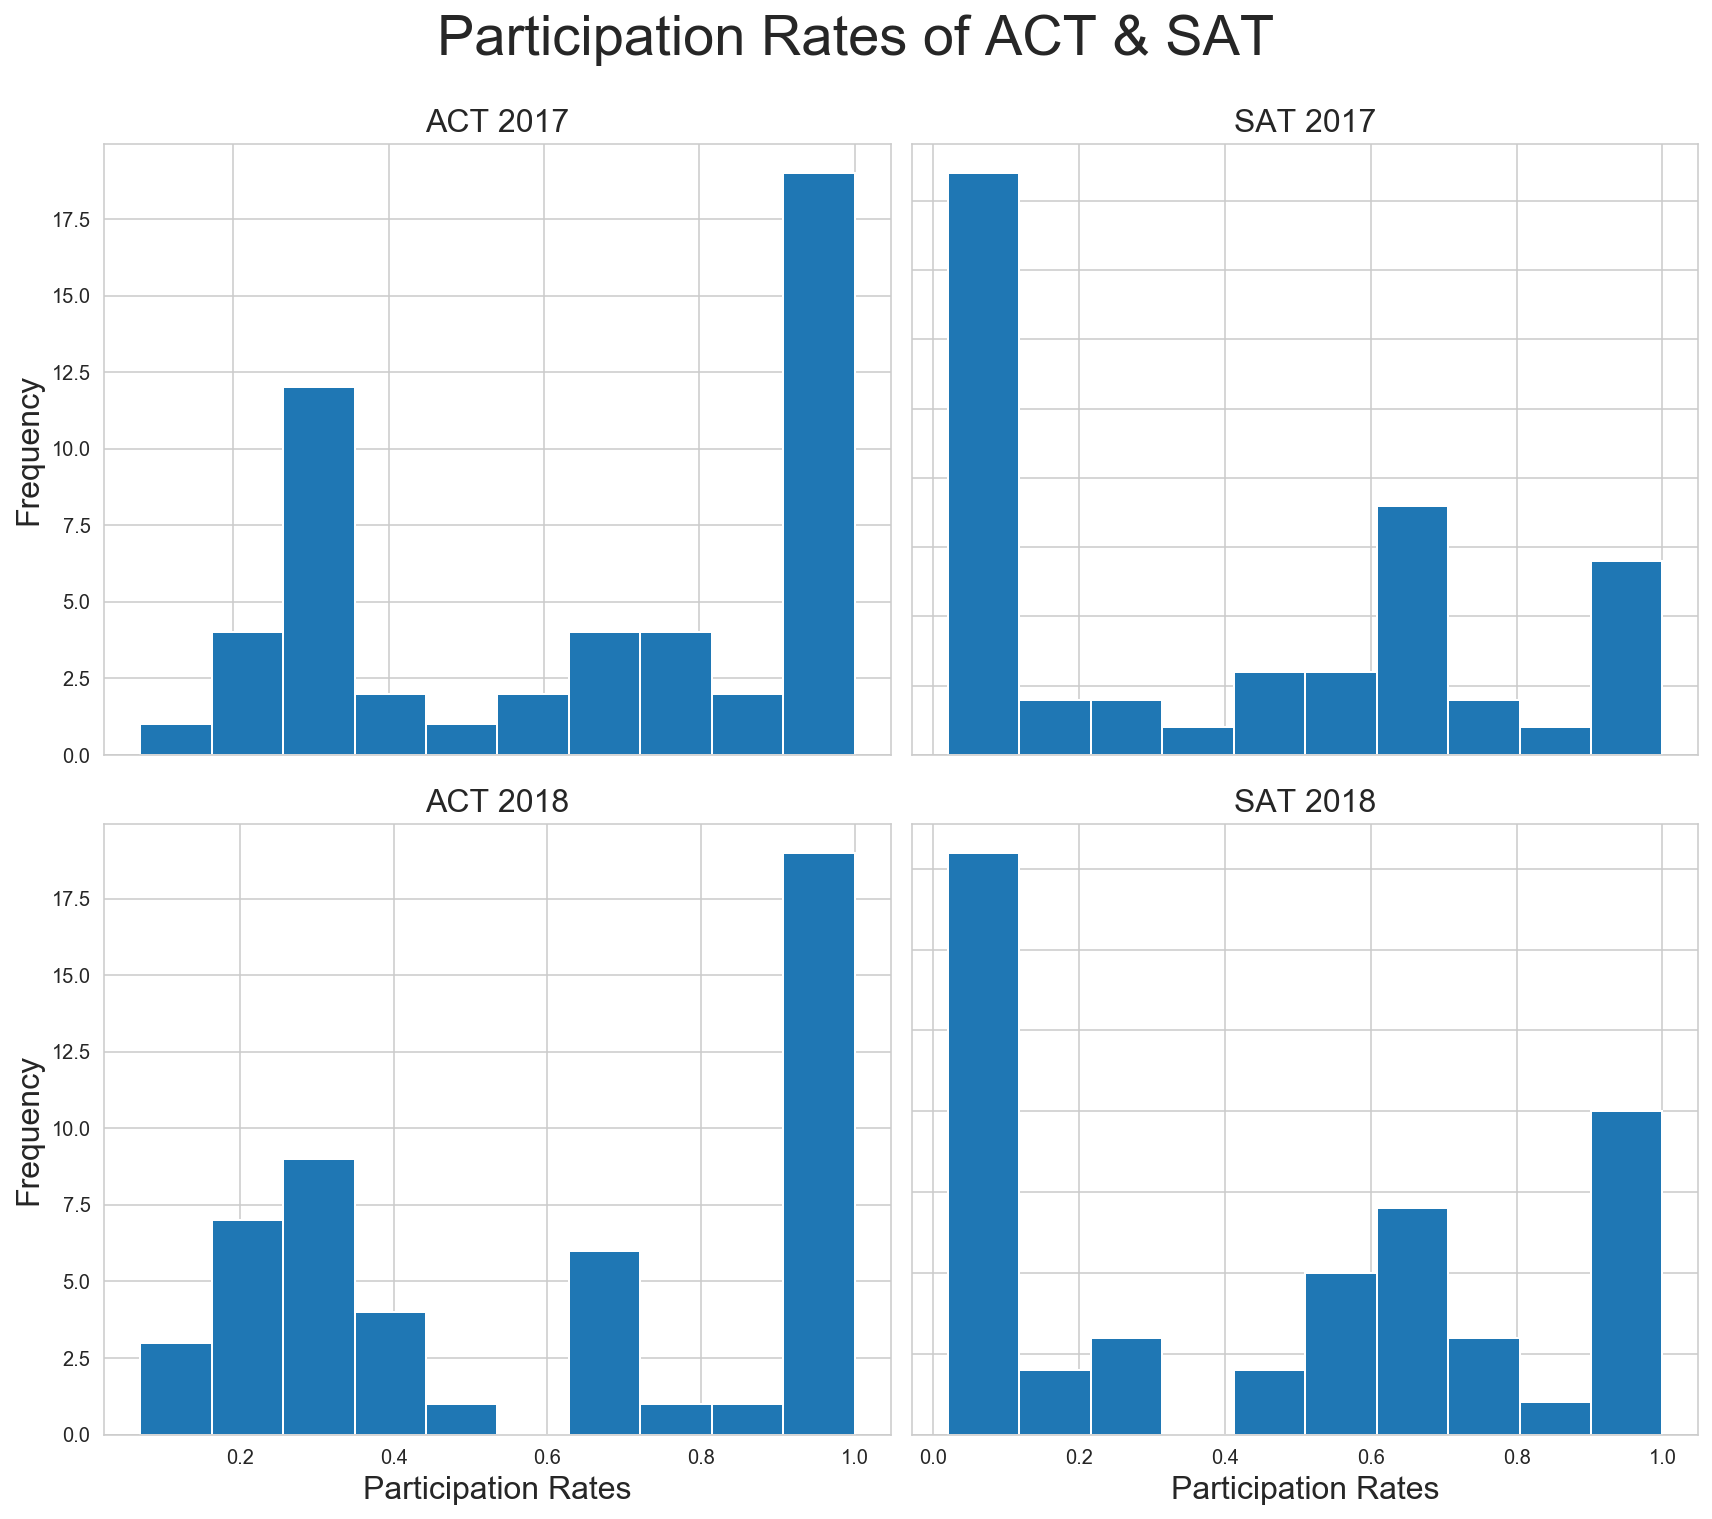

In [985]:
# Histograms on Participation rates for ACT & SAT 
supertitle = 'Participation Rates of ACT & SAT' 
columns = ['ACT_Participation_2017','SAT_Participation_2017','ACT_Participation_2018','SAT_Participation_2018']
title = ['ACT 2017','SAT 2017','ACT 2018','SAT 2018']
xlabel = ['Participation Rates','Participation Rates','Participation Rates','Participation Rates']
ylabel = ['Frequency','Frequency','Frequency','Frequency']

subplot_histograms(final, columns,title, xlabel,ylabel,supertitle)


Participation rates in ACT are higher as compared to SAT, with more states having 100% participation in ACT than SAT. On the flipside, there are more states which participation rates are below 10% for SAT. 
 

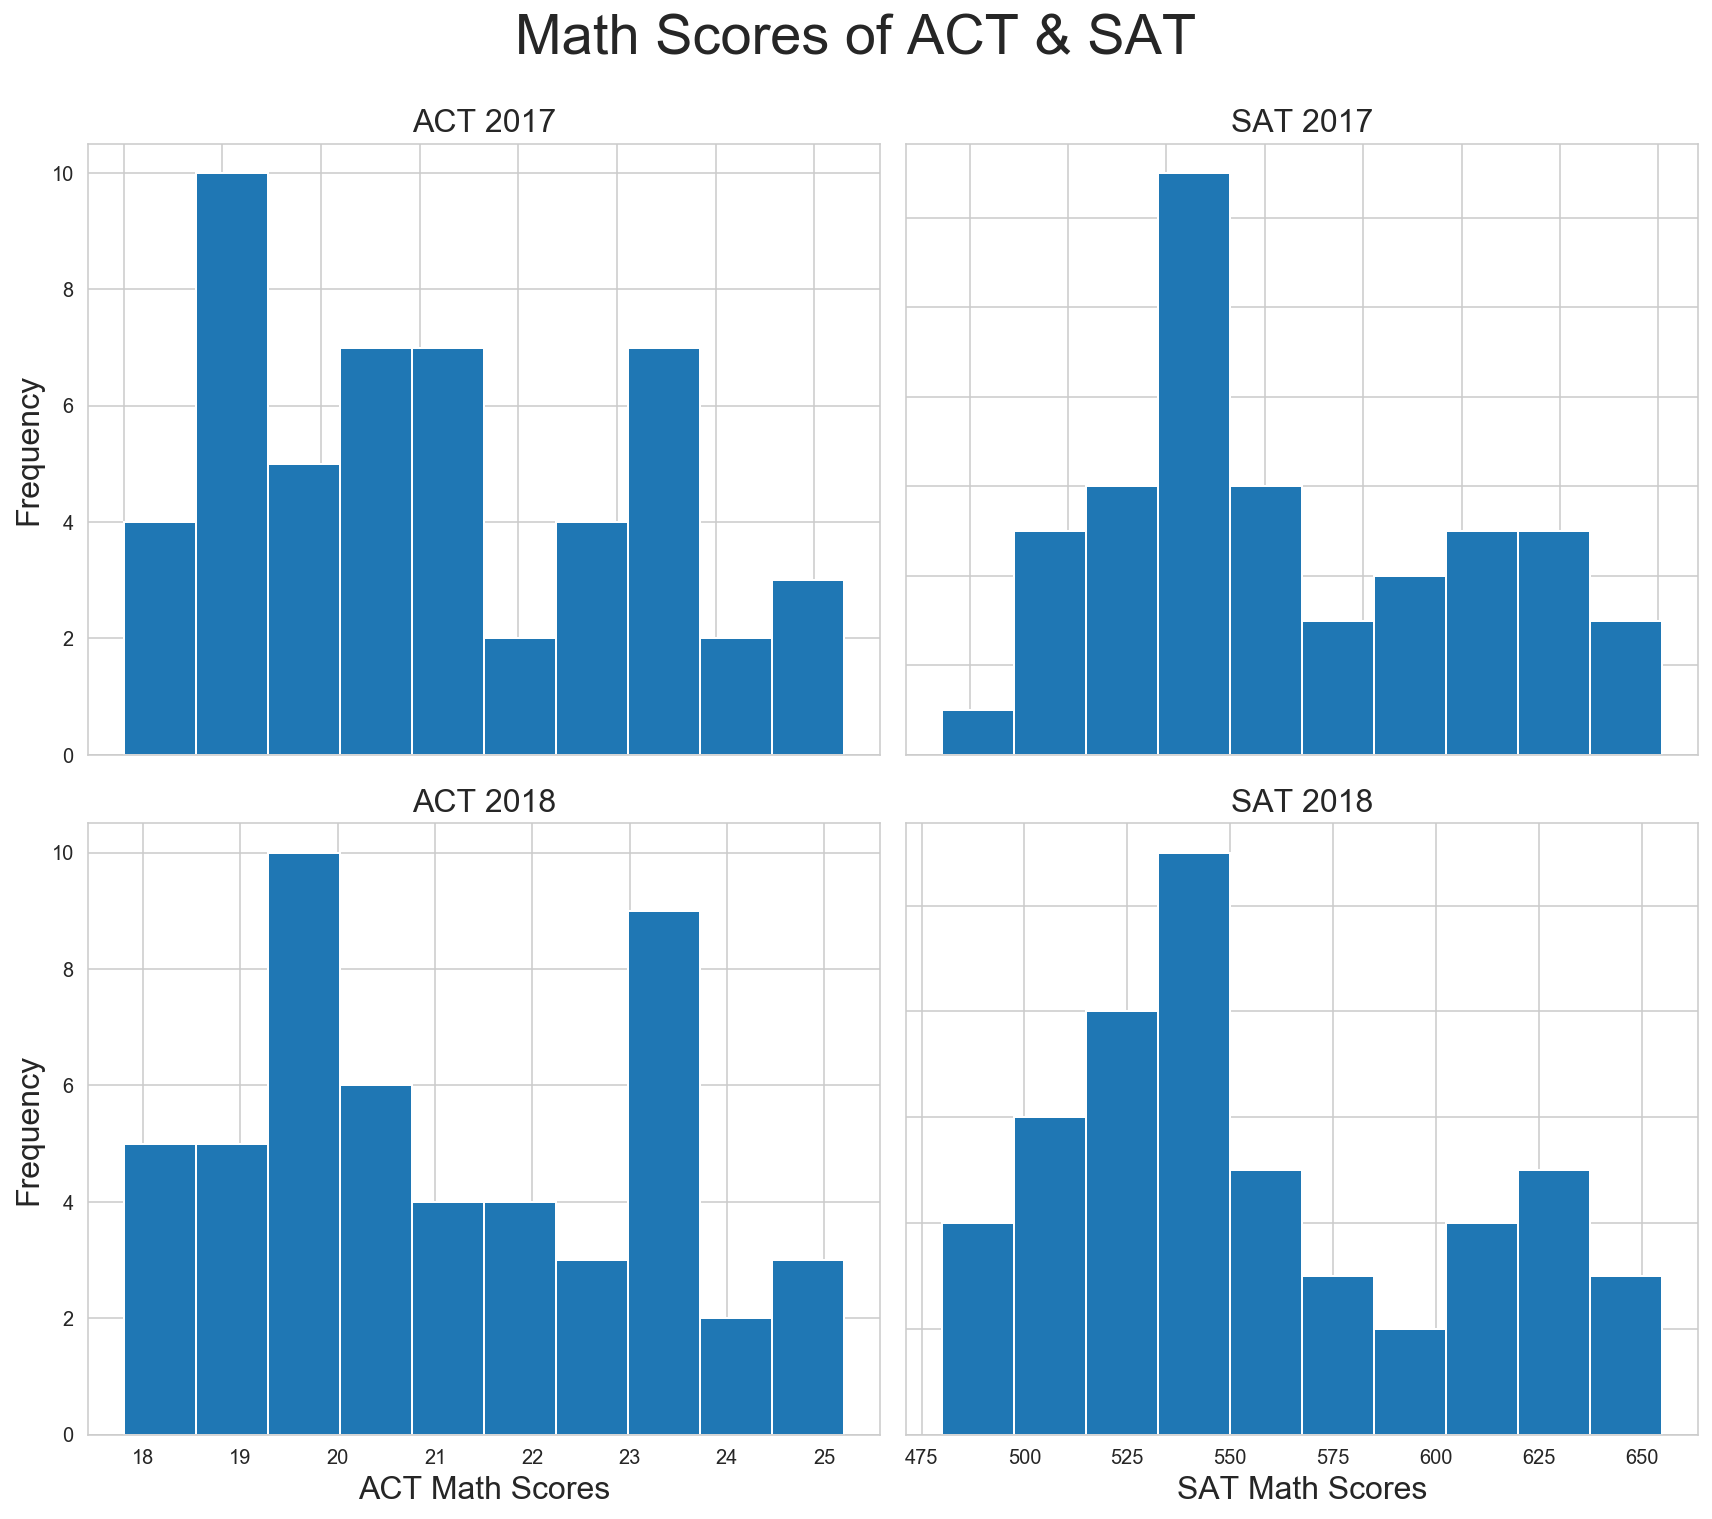

In [986]:
# Histograms on Math Scores for ACT & SAT 
supertitle = 'Math Scores of ACT & SAT' 
columns = ['ACT_Math_2017','SAT_Math_2017','ACT_Math_2018','SAT_Math_2018']
title = ['ACT 2017','SAT 2017','ACT 2018','SAT 2018']
xlabel = ['ACT Math Scores','SAT Math Scores','ACT Math Scores','SAT Math Scores']
ylabel = ['Frequency','Frequency','Frequency','Frequency']


subplot_histograms(final, columns,title, xlabel,ylabel,supertitle)

The distributions for both ACT and SAT Math Scores are similar and seem bimodal in nature. However, the ACT Math Score distribution peaks seems to be sharper compared to that of SAT. 

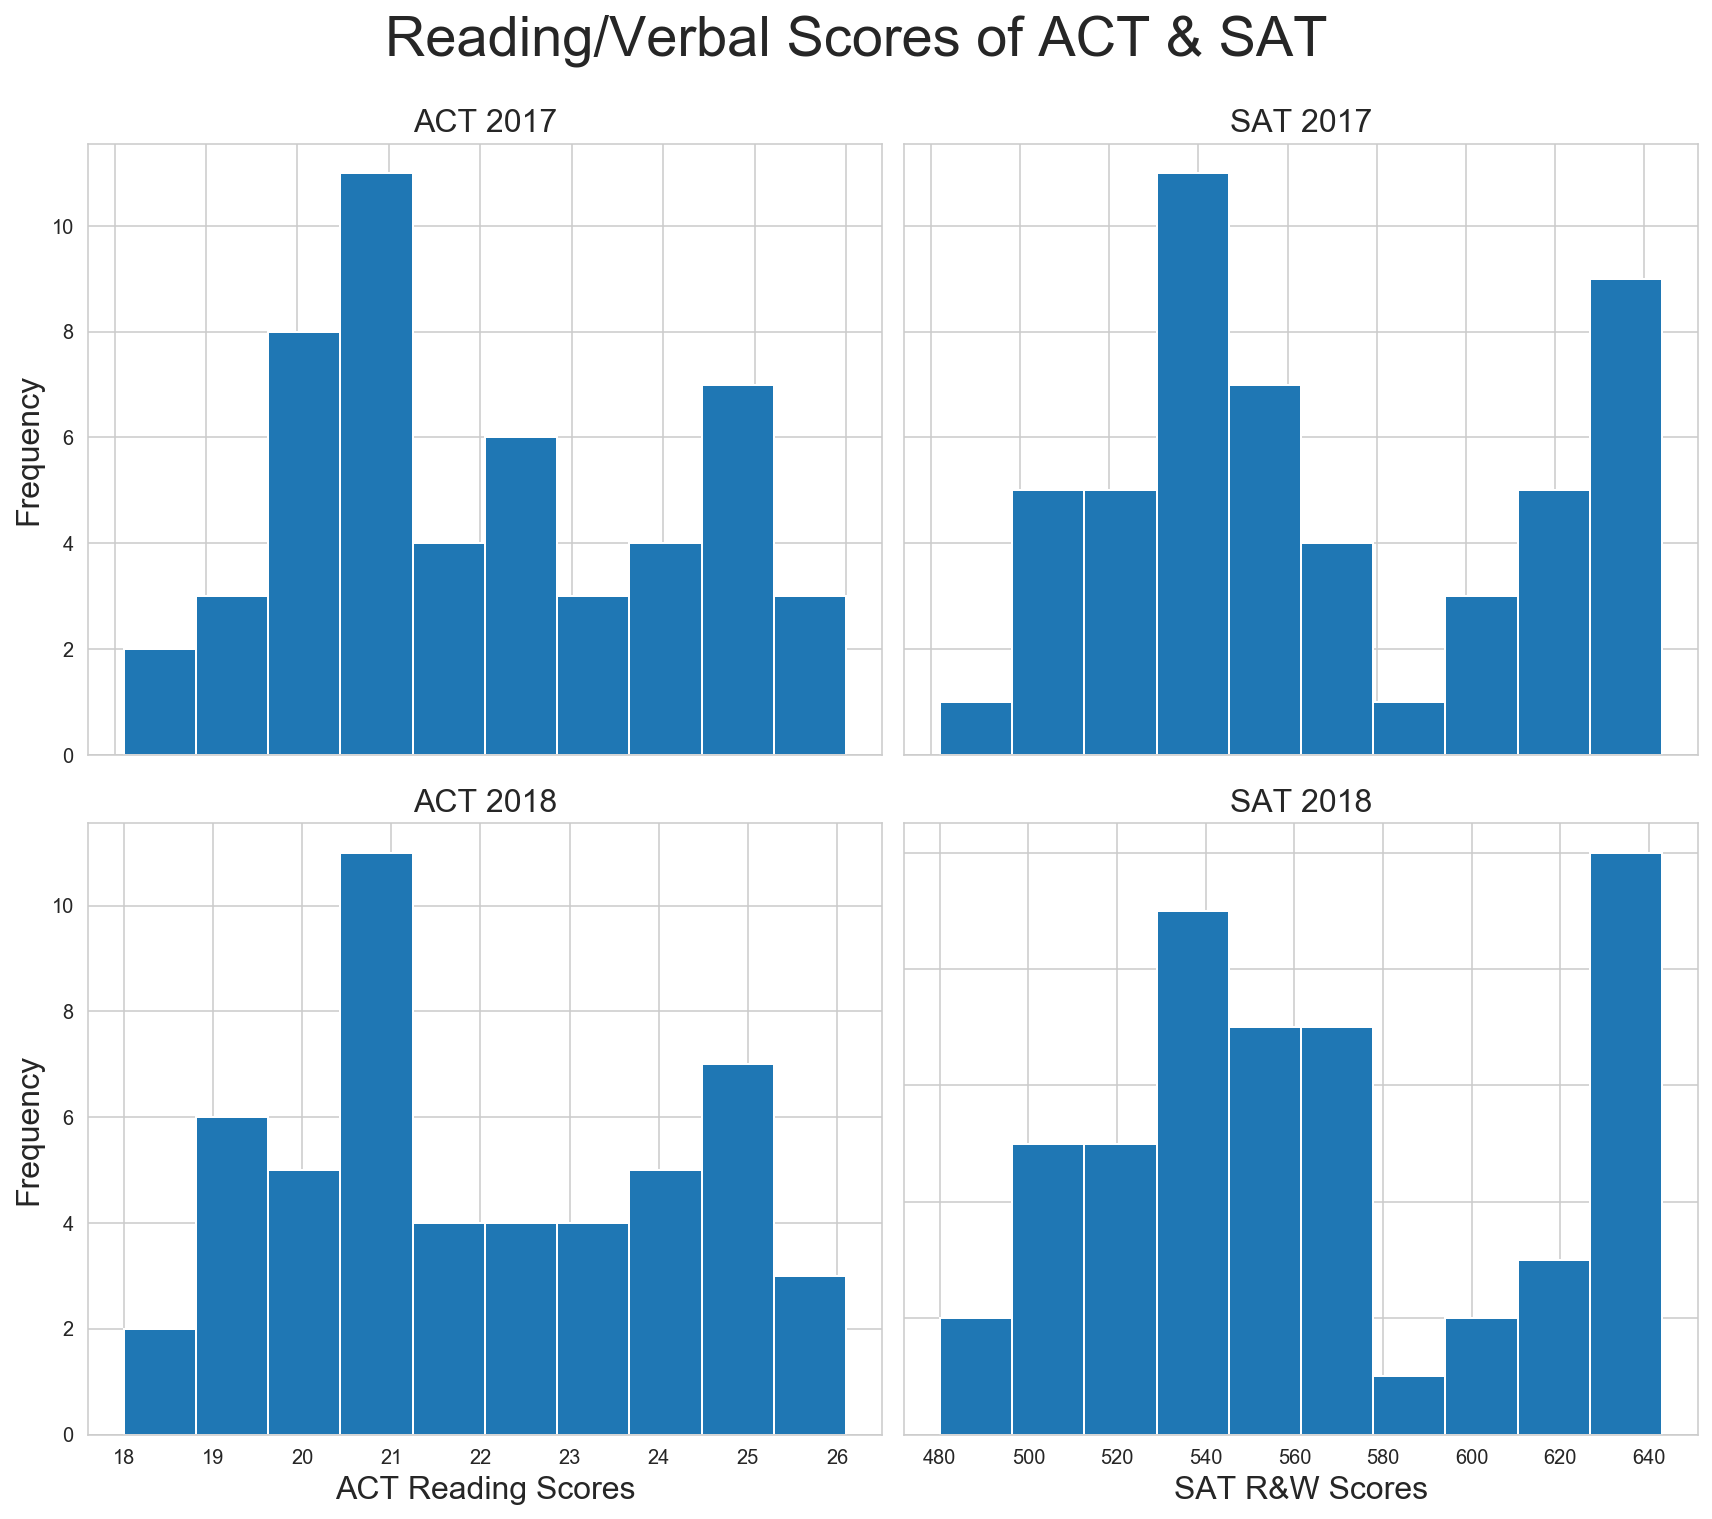

In [987]:
# Histograms on Reading/Verbal Scores for ACT & SAT 
supertitle = 'Reading/Verbal Scores of ACT & SAT' 
columns = ['ACT_Reading_2017','SAT_R&W_2017','ACT_Reading_2018','SAT_R&W_2018']
title = ['ACT 2017','SAT 2017','ACT 2018','SAT 2018']
xlabel = ['ACT Reading Scores','SAT R&W Scores','ACT Reading Scores','SAT R&W Scores']
ylabel = ['Frequency','Frequency','Frequency','Frequency']


subplot_histograms(final, columns,title, xlabel,ylabel,supertitle)

As with the Math Scores, the distributions regarding Reading/Verbal scores for ACT and SAT look similar. The distributions look bimodal, with SAT's distribution peaking towards the far right as opposed to ACT's flatter distribution. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [988]:
def scatterplot(df, x, y, title, x_label, y_label): 
    
    fig, ax = plt.subplots(figsize=(12,10)) 
    
    plt.scatter(df[x].to_list(),df[y].to_list())
    
    plt.xlabel(x_label,fontsize = 16)
    plt.ylabel(y_label,fontsize = 16)

    plt.suptitle(title, fontsize = 28, fontweight=20,y=1.05)
    
    return plt.show()

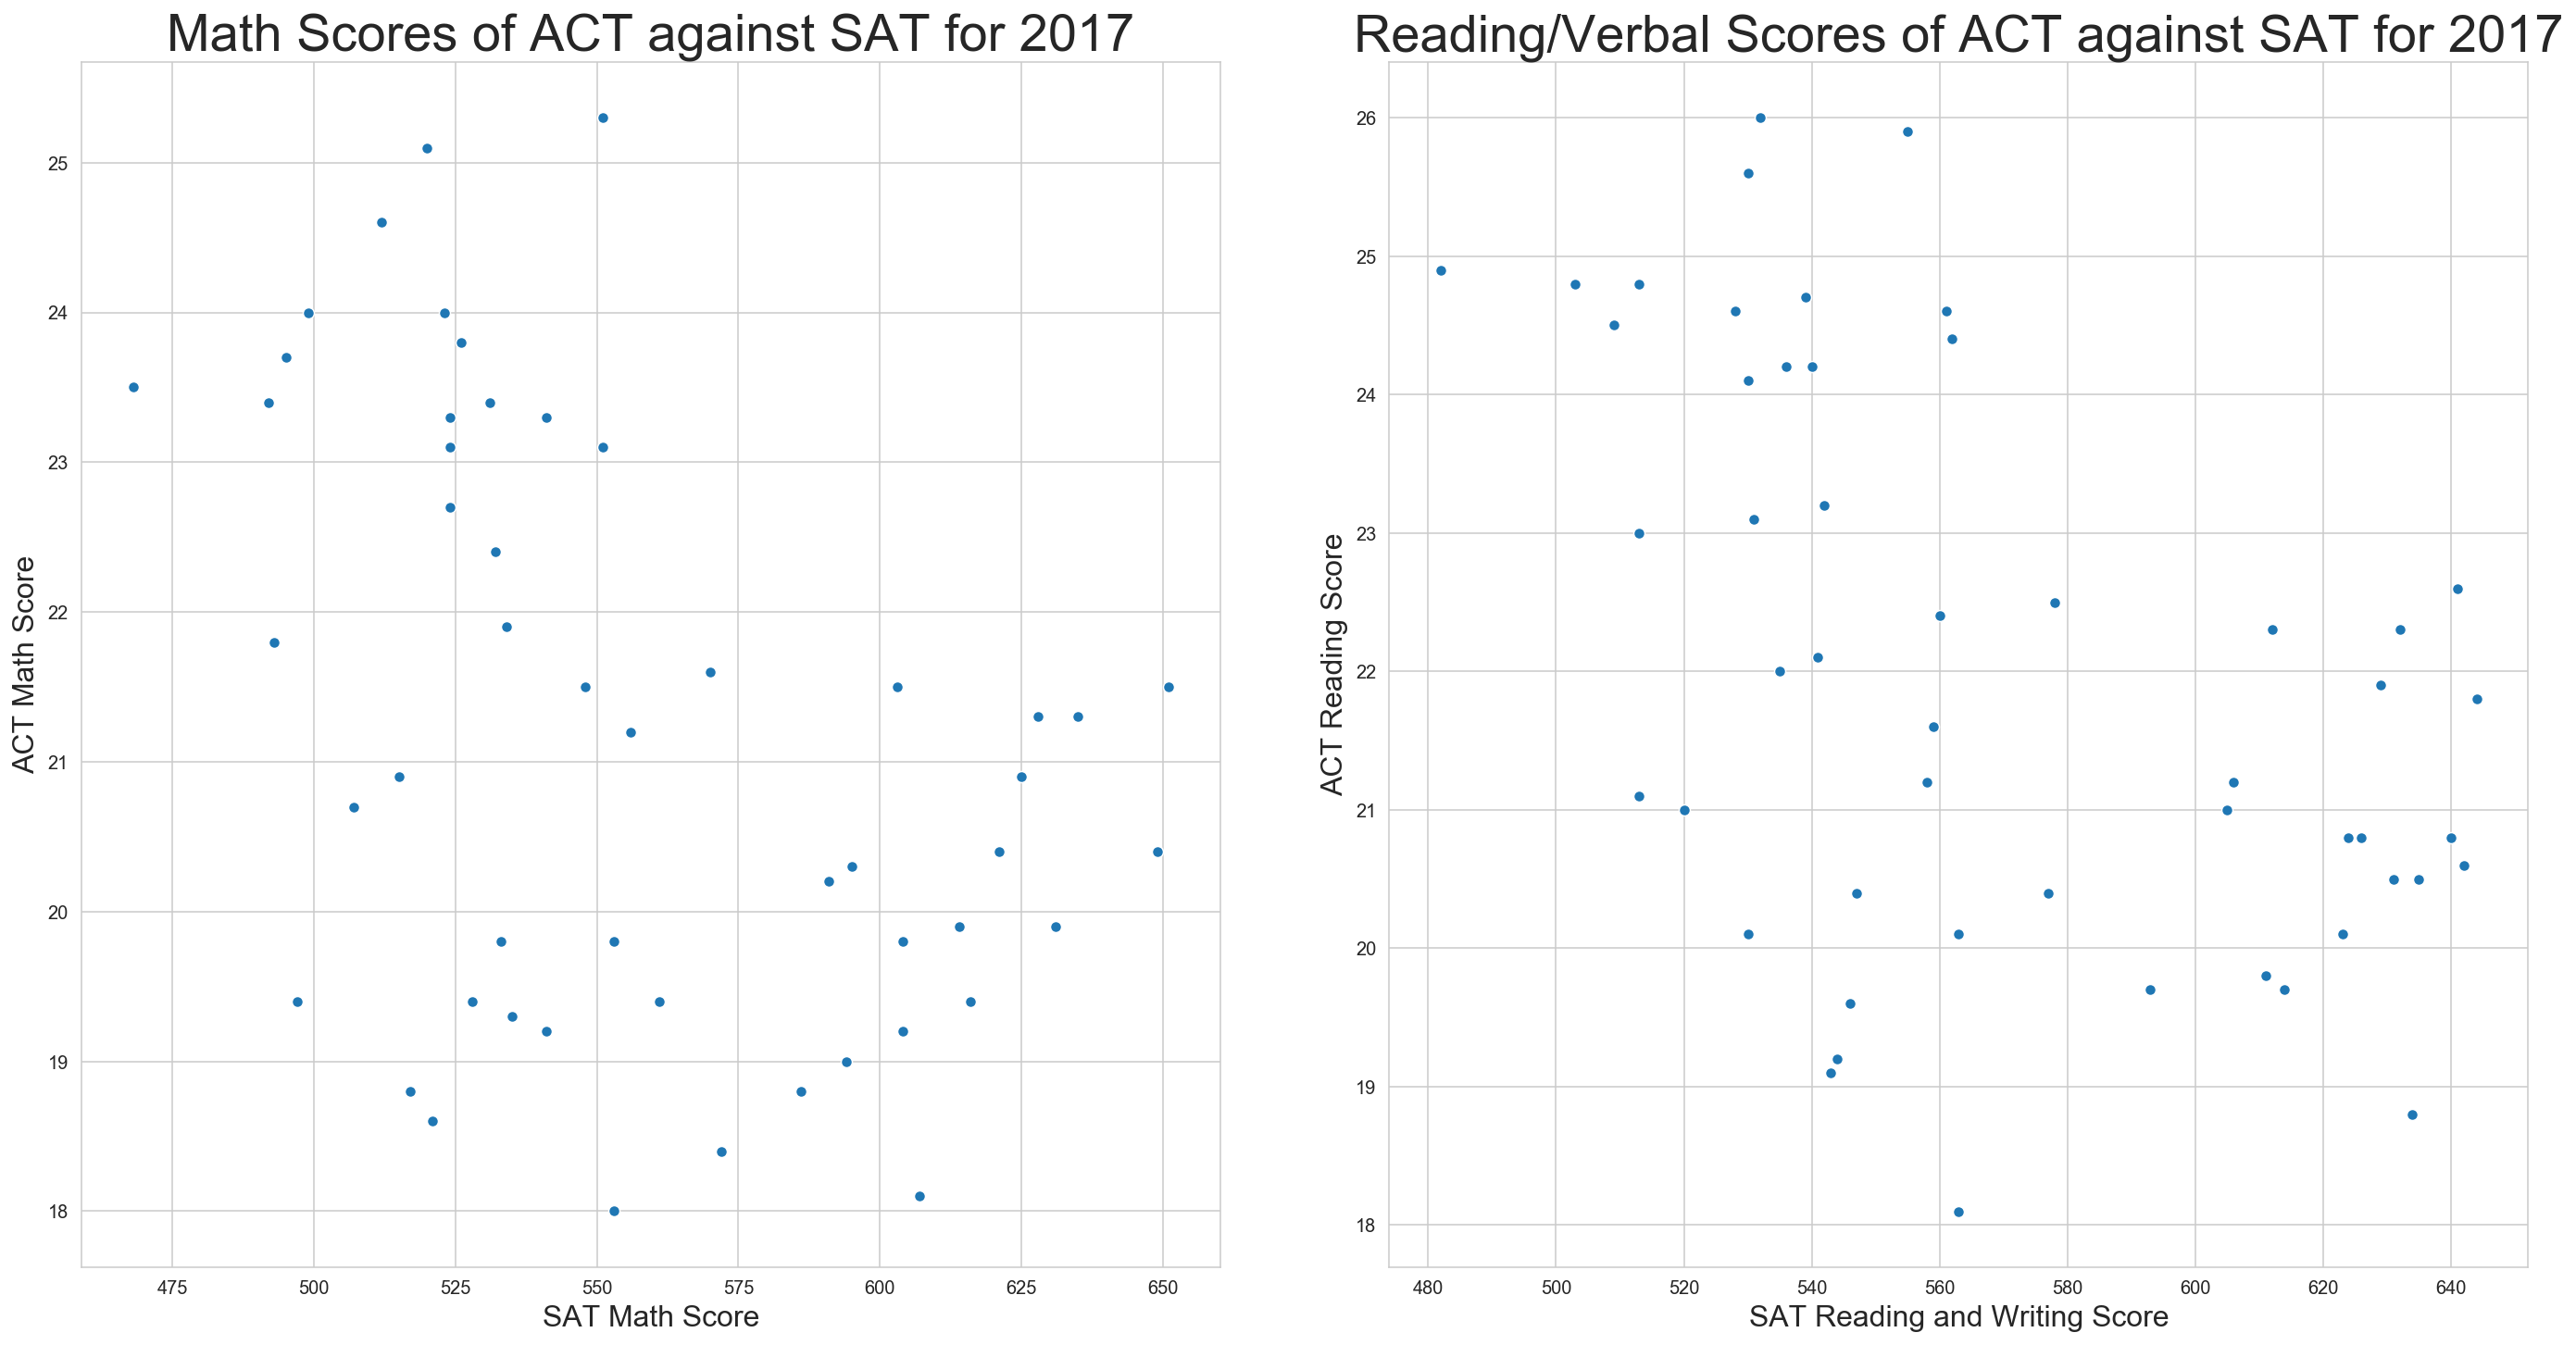

In [989]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10)) 

sns.scatterplot(x='SAT_Math_2017',y='ACT_Math_2017',data=final, ax=ax1)
sns.scatterplot(x='SAT_R&W_2017',y='ACT_Reading_2017',data=final, ax=ax2)

ax1.set_xlabel('SAT Math Score', fontsize=16)
ax1.set_ylabel('ACT Math Score', fontsize=16)
ax1.set_title('Math Scores of ACT against SAT for 2017', fontsize=28)

ax2.set_xlabel('SAT Reading and Writing Score', fontsize=16)
ax2.set_ylabel('ACT Reading Score', fontsize=16)
ax2.set_title('Reading/Verbal Scores of ACT against SAT for 2017', fontsize=28)

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

Interestingly, from both scatterplots, the relationship of ACT test subjects against SAT test subjects are somewhat negatively correlated. For example, states which register a high mean score for an ACT test subject tend to fare less well on the same test subject administed by ACT. There is not a state which have registered relatively high subject scores in both ACT and SAT. 
  
Theoretically, assuming the samples ACT and SAT subject scores are independent of each other, both ACT and SAT for any given test subject should register a positive correlation. Since this is not the case, it could only mean that the given samples are not truly independent of each other.

We recall that the sample means are taken from state averages. From earlier data observations and analyses, it has been established that participation rates for both ACT and SAT and not independent of each other. Examples like Colorado shed light on how participation rates differ for ACT and SAT. The participation rates in each state could be the main confounder in trying to determine a more accurate relationship between ACT and SAT test subjects. 

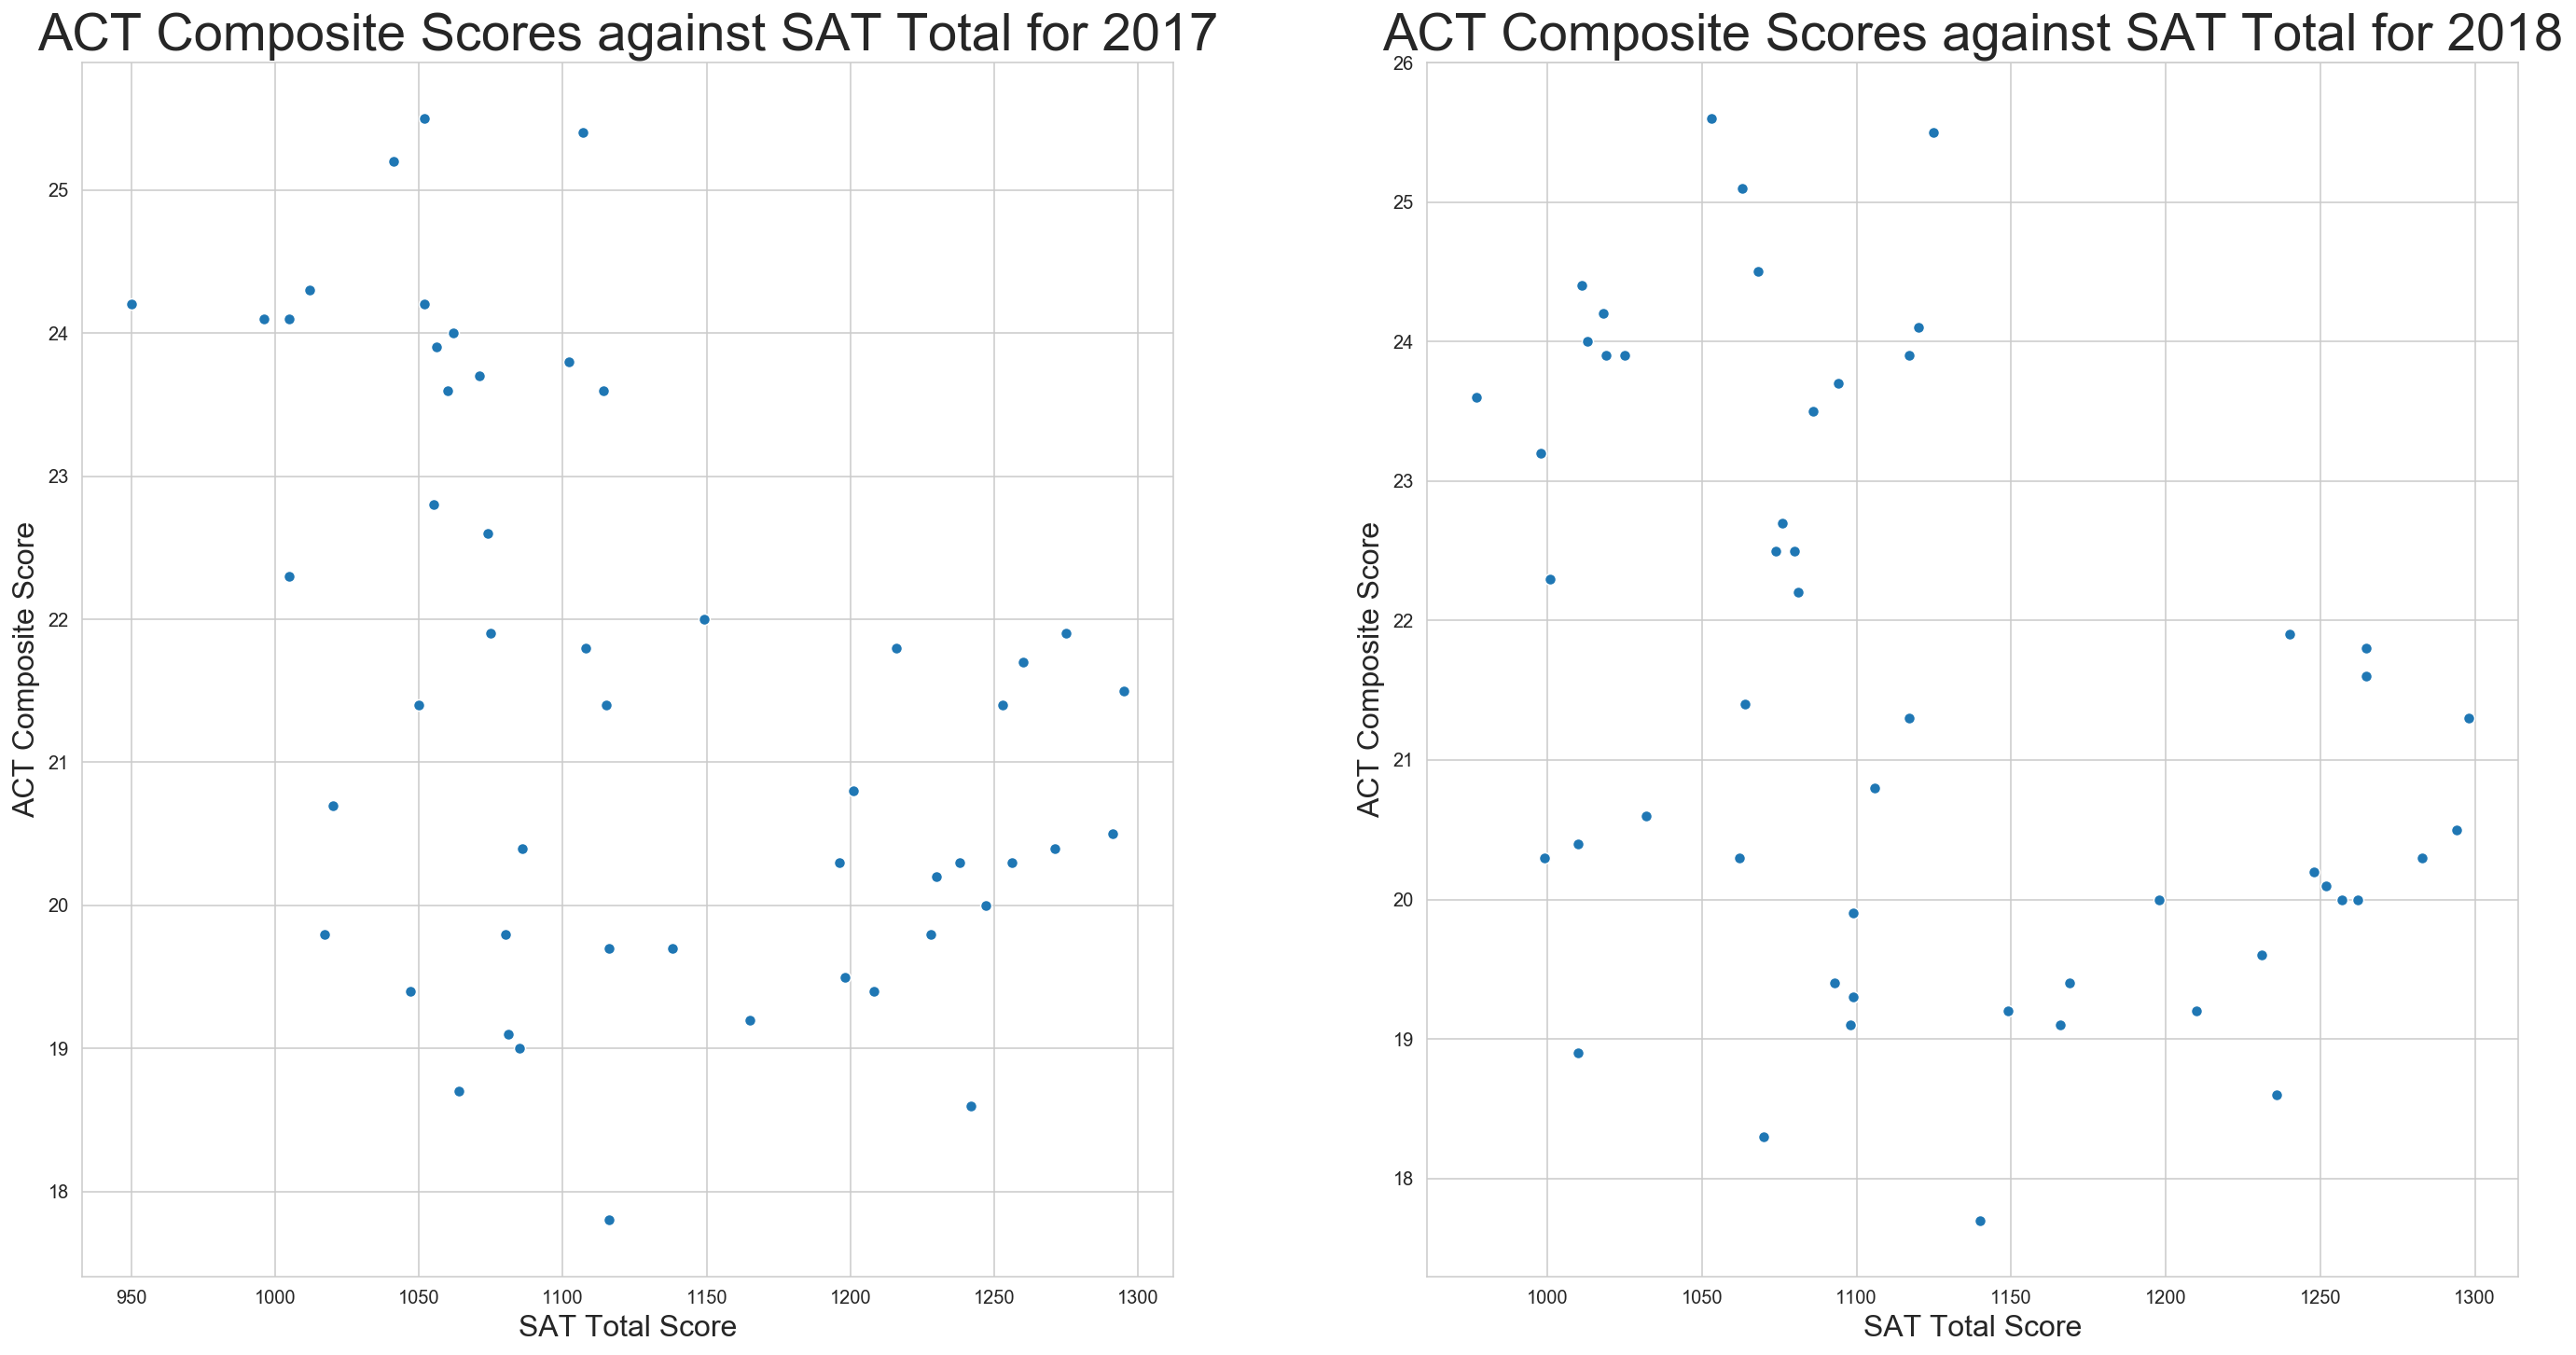

In [990]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10)) 

sns.scatterplot(x='SAT_Total_2017',y='ACT_Composite_2017',data=final, ax=ax1)
sns.scatterplot(x='SAT_Total_2018',y='ACT_Composite_2018',data=final, ax=ax2)

ax1.set_xlabel('SAT Total Score', fontsize=16)
ax1.set_ylabel('ACT Composite Score', fontsize=16)
ax1.set_title('ACT Composite Scores against SAT Total for 2017', fontsize=28)

ax2.set_xlabel('SAT Total Score', fontsize=16)
ax2.set_ylabel('ACT Composite Score', fontsize=16)
ax2.set_title('ACT Composite Scores against SAT Total for 2018', fontsize=28)

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

Similarly, the spread of both scatterplots are similar to like the ones above (i.e. Math and Reading Scores). The Composite/Total Scores are simply derivatives of the test subjects, thus these scatter plots would exhibit similar spreads.  

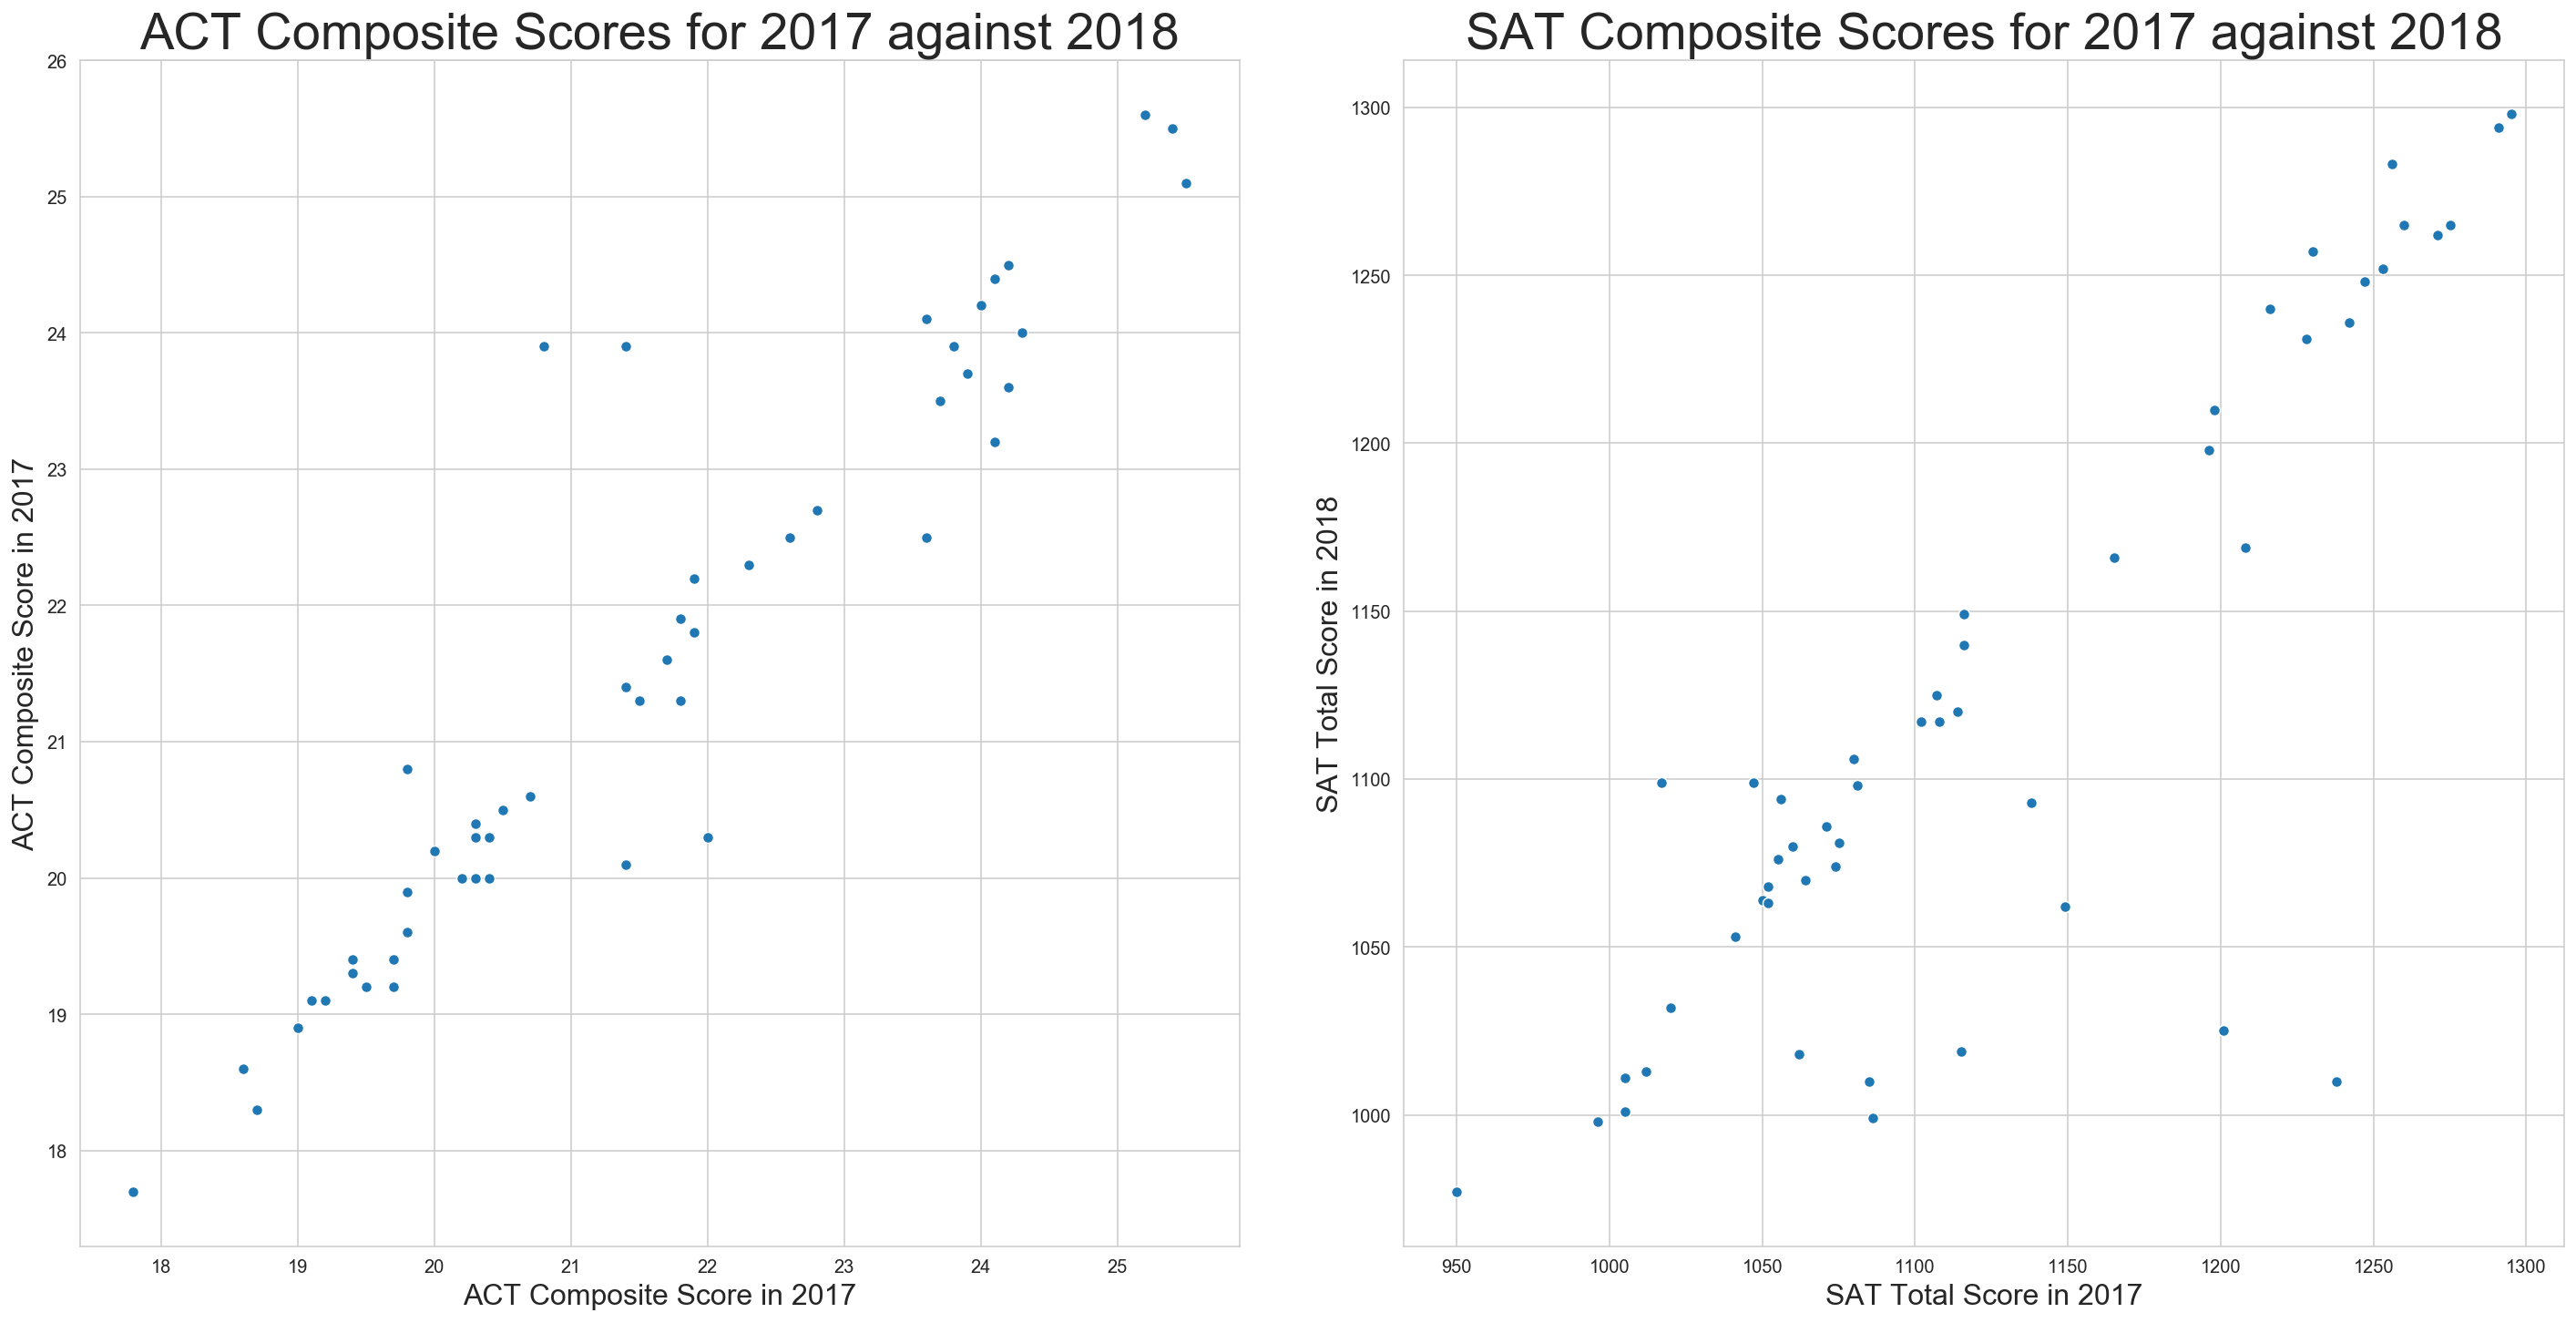

In [991]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10)) 

sns.scatterplot(x='ACT_Composite_2017',y='ACT_Composite_2018',data=final, ax=ax1)
sns.scatterplot(x='SAT_Total_2017',y='SAT_Total_2018',data=final, ax=ax2)

ax1.set_xlabel('ACT Composite Score in 2017', fontsize=16)
ax1.set_ylabel('ACT Composite Score in 2017', fontsize=16)
ax1.set_title('ACT Composite Scores for 2017 against 2018', fontsize=28)

ax2.set_xlabel('SAT Total Score in 2017', fontsize=16)
ax2.set_ylabel('SAT Total Score in 2018', fontsize=16)
ax2.set_title('SAT Composite Scores for 2017 against 2018', fontsize=28)

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

Both scatterplots suggest a positive correlation, which means ACT/SAT scores for both years are similar. However, we notice slight outliers in SAT's scatterplot. A reason for these outliers could have been due to the change in participation rates for SAT tests. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [992]:
final.head()

,State,ACT_Participation_2017,ACT_English_2017,ACT_Math_2017,ACT_Reading_2017,ACT_Science_2017,ACT_Composite_2017,SAT_Participation_2017,SAT_R&W_2017,SAT_Math_2017,...,ACT_Participation_2018,ACT_English_2018,ACT_Math_2018,ACT_Reading_2018,ACT_Science_2018,ACT_Composite_2018,SAT_Participation_2018,SAT_R&W_2018,SAT_Math_2018,SAT_Total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [993]:
# Code
def sns_subplot_boxplot(df, list_of_columns,list_of_titles,list_of_ylabels,supertitle):
    
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(10,10))
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(y=list_of_columns[i], data = df, orient = 'v', ax = ax[i])
    
        ax[i].set_title(list_of_titles[i], fontsize = 16)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 16)
        
    for ax in ax.flat:
        ax.label_outer()
        
    plt.tight_layout()

    fig.suptitle(supertitle, fontsize = 16, fontweight=28,y=1.05)
    
    return plt.show()

In [994]:
final_columns = ['ACT_Participation_2017','ACT_English_2017','ACT_Math_2017','ACT_Reading_2017','ACT_Science_2017',
                 'ACT_Composite_2017','SAT_Participation_2017', 'SAT_R&W_2017','SAT_Math_2017','SAT_Total_2017',
                 'ACT_Participation_2018','ACT_English_2018','ACT_Math_2018','ACT_Reading_2018','ACT_Science_2018',
                 'ACT_Composite_2018','SAT_Participation_2018','SAT_R&W_2018','SAT_Math_2018','SAT_Total_2018']

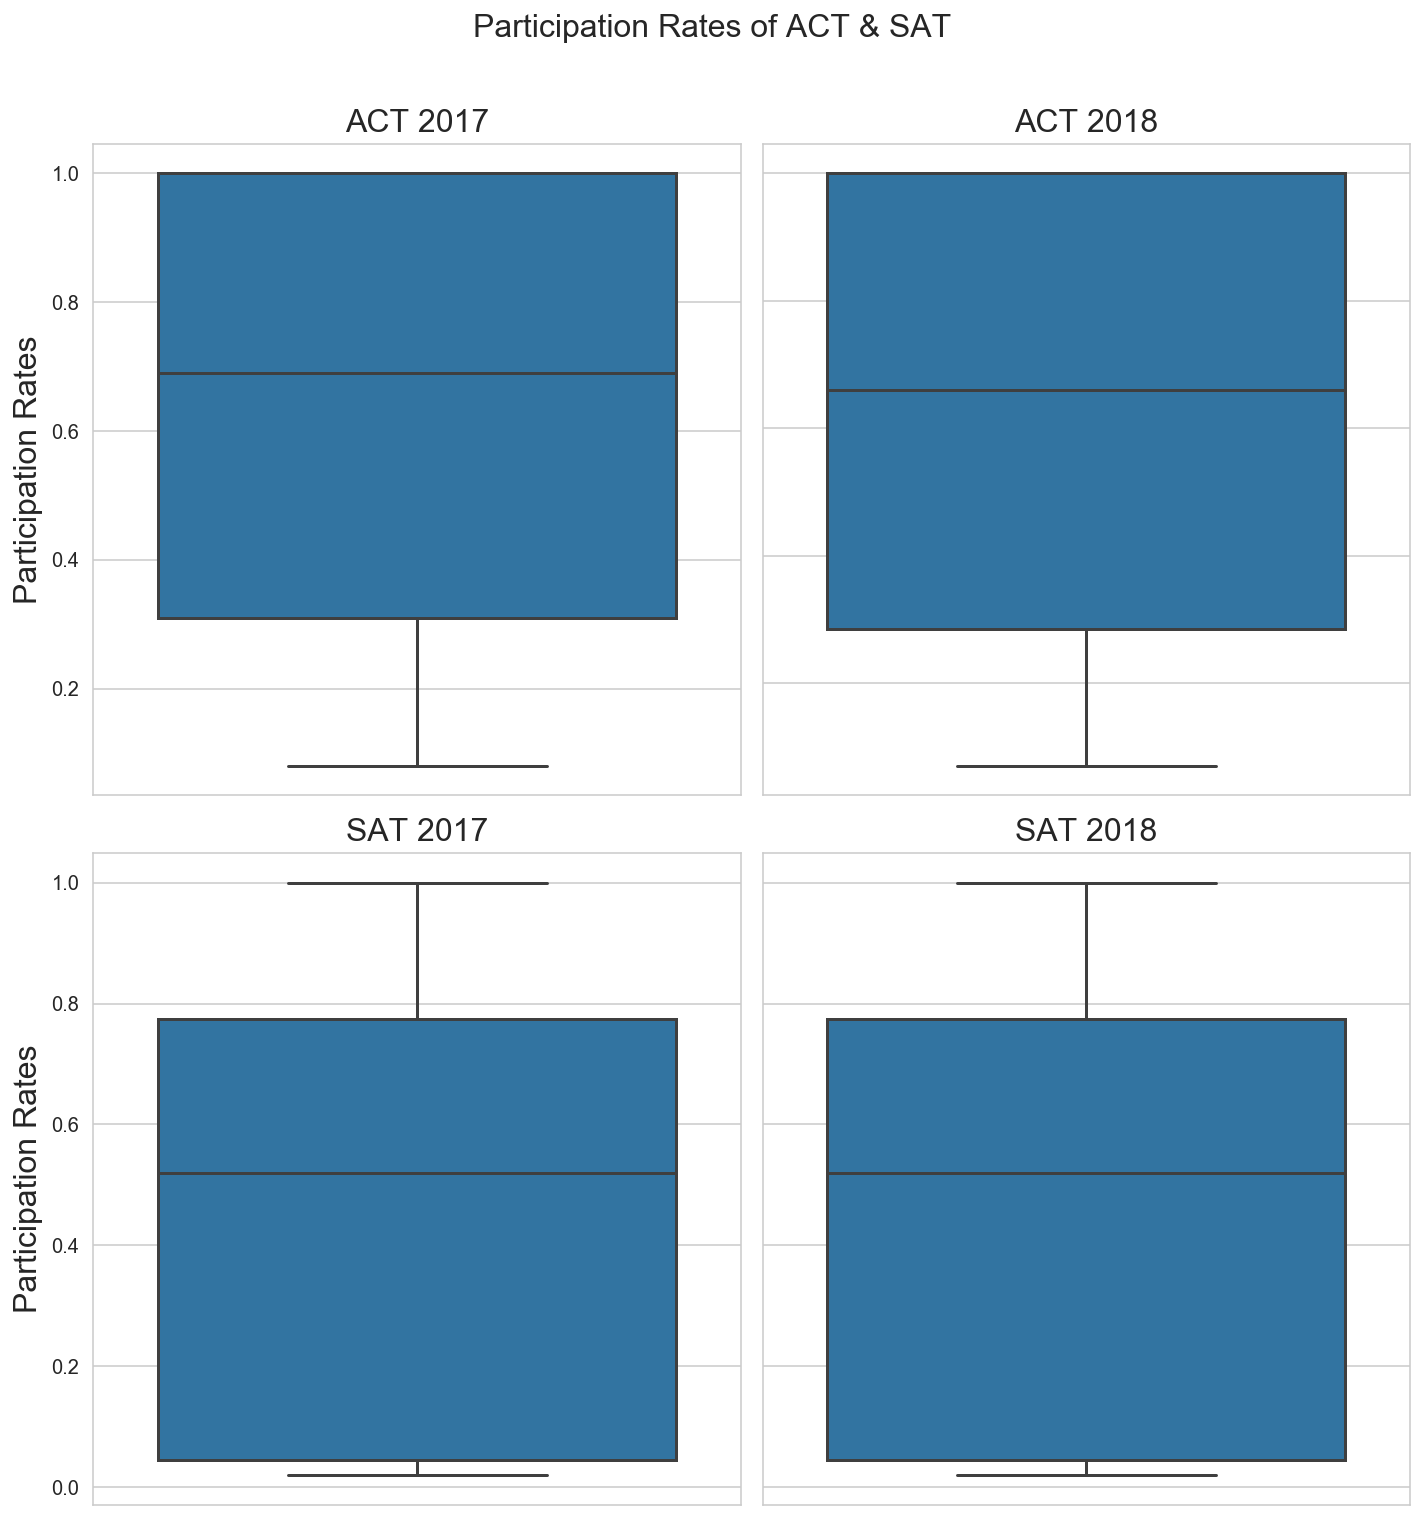

In [995]:
supertitle = 'Participation Rates of ACT & SAT'


final_part_columns = ['ACT_Participation_2017','ACT_Participation_2018','SAT_Participation_2018','SAT_Participation_2018']
part_rate_title = ['ACT 2017','ACT 2018','SAT 2017','SAT 2018']
part_rate_ylabel = ['Participation Rates','Participation Rates','Participation Rates','Participation Rates']

sns_subplot_boxplot(final, final_part_columns,part_rate_title,part_rate_ylabel,supertitle)

Similar to the histograms earlier, there are higher ACT participation rates than SAT participation rates. The ACT median is around 70% for both years and the SAT Median at 50%.  The ACT boxplots have no upper whiskers because the datasets from the upper quartile mostly register 100% participation.

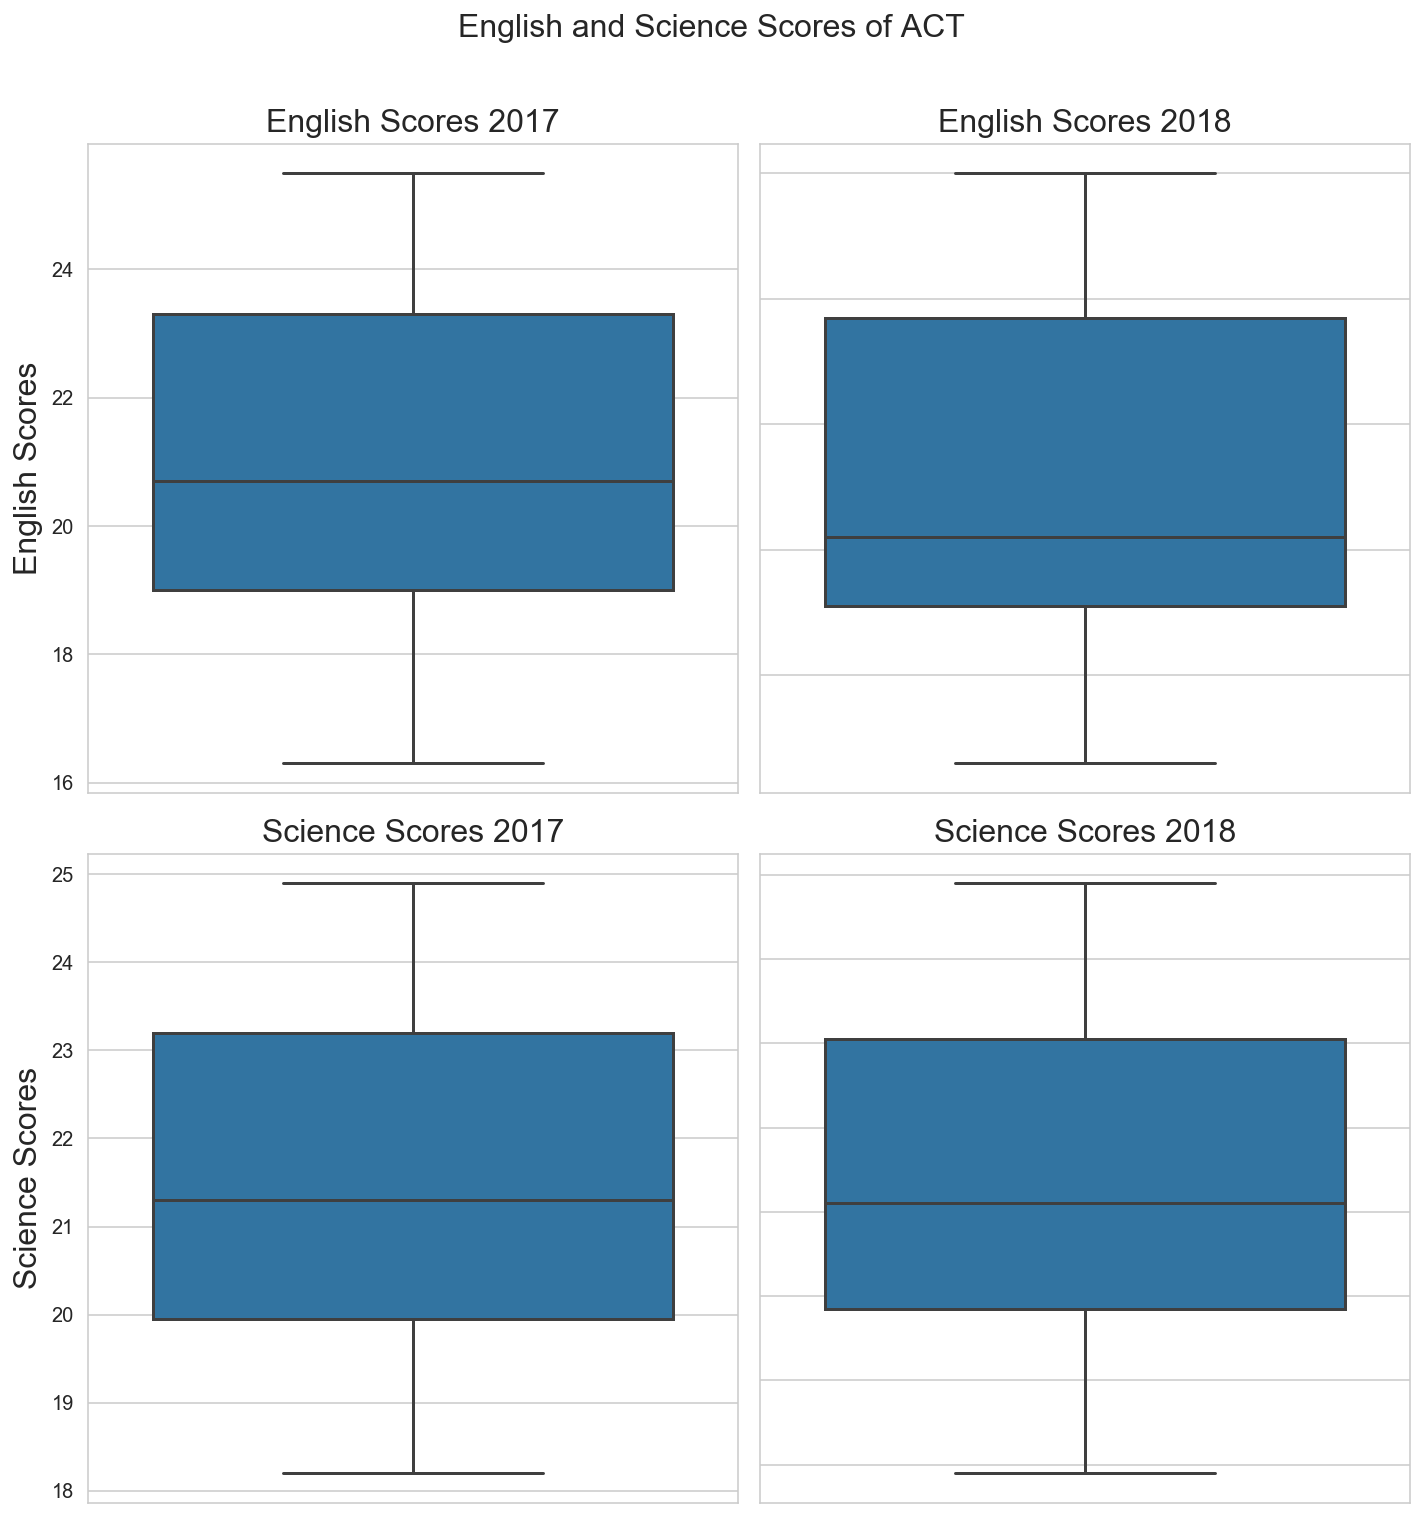

In [996]:
supertitle = 'English and Science Scores of ACT'

final_part_columns = ['ACT_English_2017','ACT_English_2018','ACT_Science_2017','ACT_Science_2018']
part_rate_title = ['English Scores 2017','English Scores 2018','Science Scores 2017','Science Scores 2018']
part_rate_ylabel = ['English Scores','English Scores','Science Scores','Science Scores',]

sns_subplot_boxplot(final, final_part_columns,part_rate_title,part_rate_ylabel,supertitle)

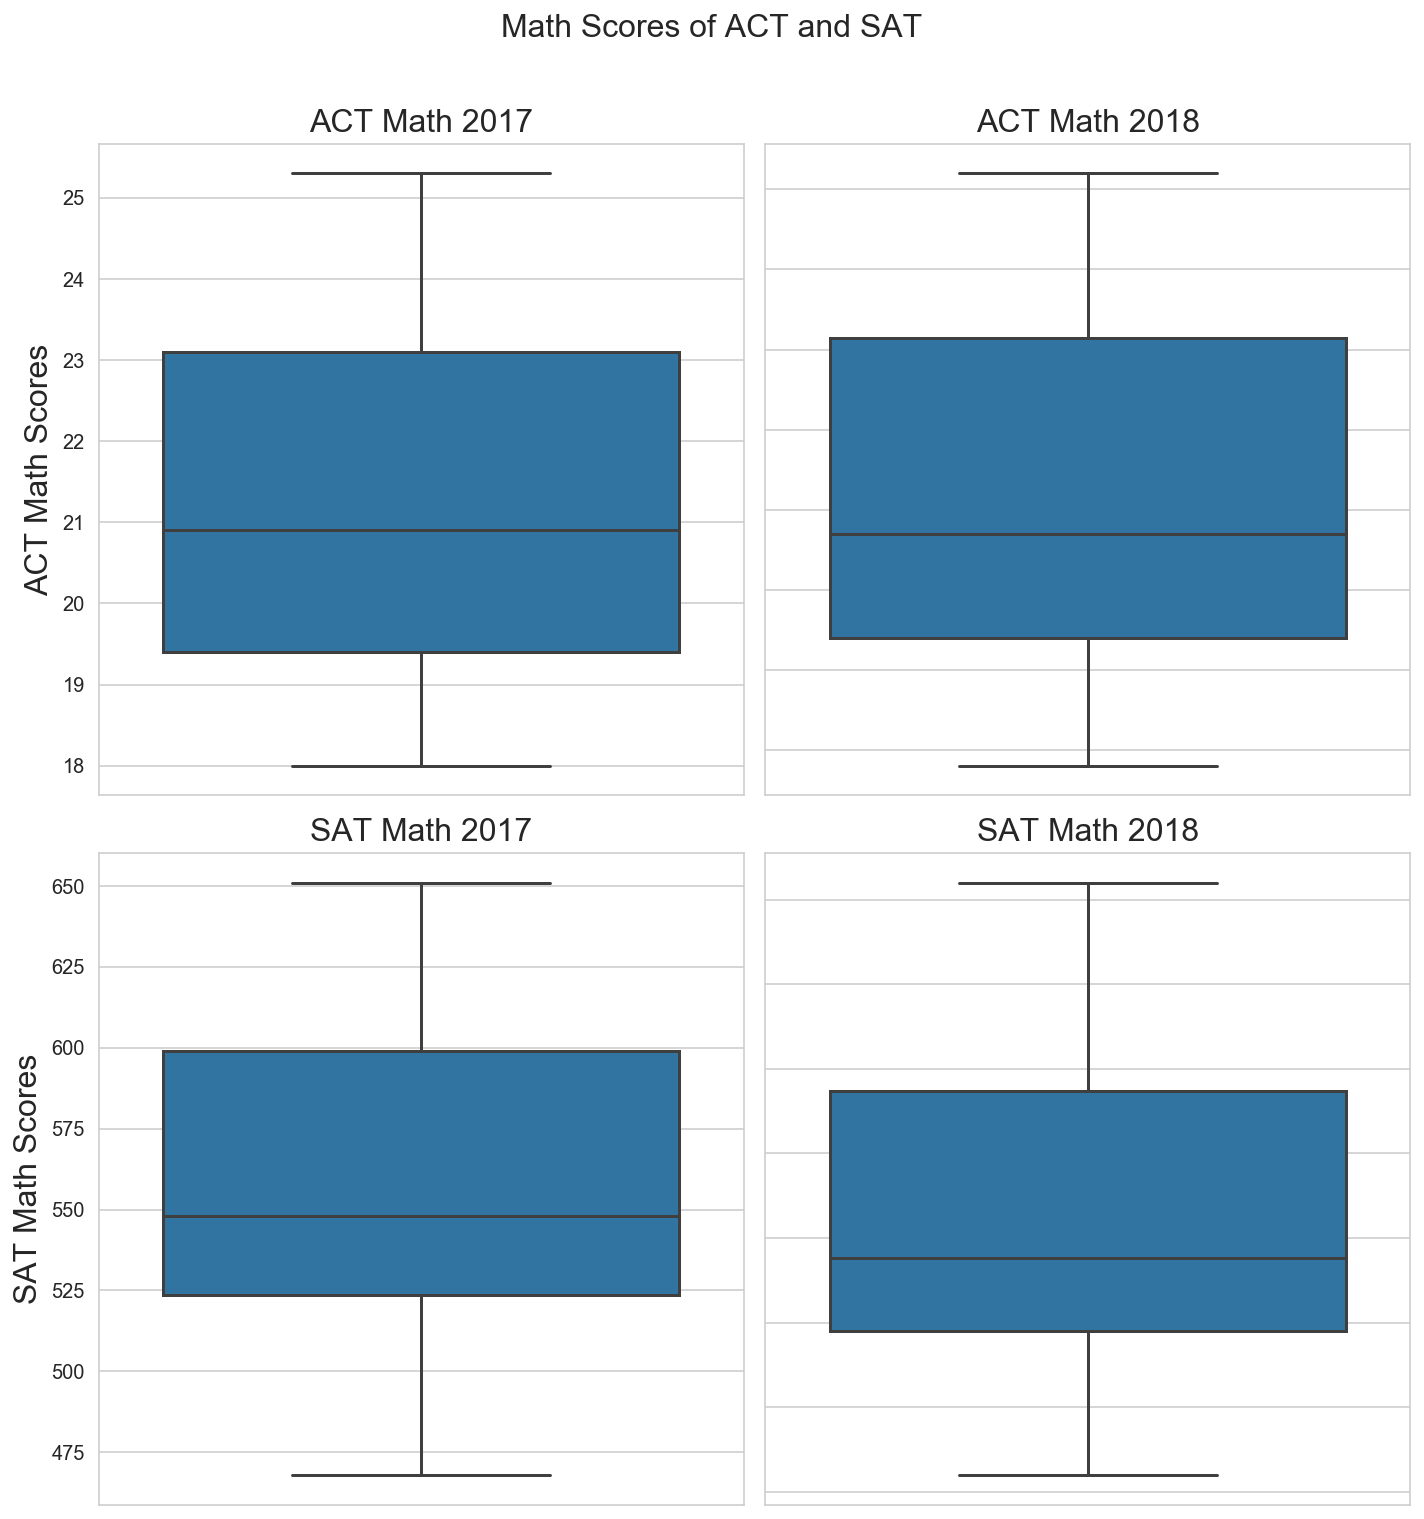

In [997]:
supertitle = 'Math Scores of ACT and SAT'

final_part_columns = ['ACT_Math_2017','ACT_Math_2018','SAT_Math_2017','SAT_Math_2018']
part_rate_title = ['ACT Math 2017','ACT Math 2018','SAT Math 2017','SAT Math 2018']
part_rate_ylabel = ['ACT Math Scores','ACT Math Scores','SAT Math Scores','SAT Math Scores']

sns_subplot_boxplot(final, final_part_columns,part_rate_title,part_rate_ylabel,supertitle)

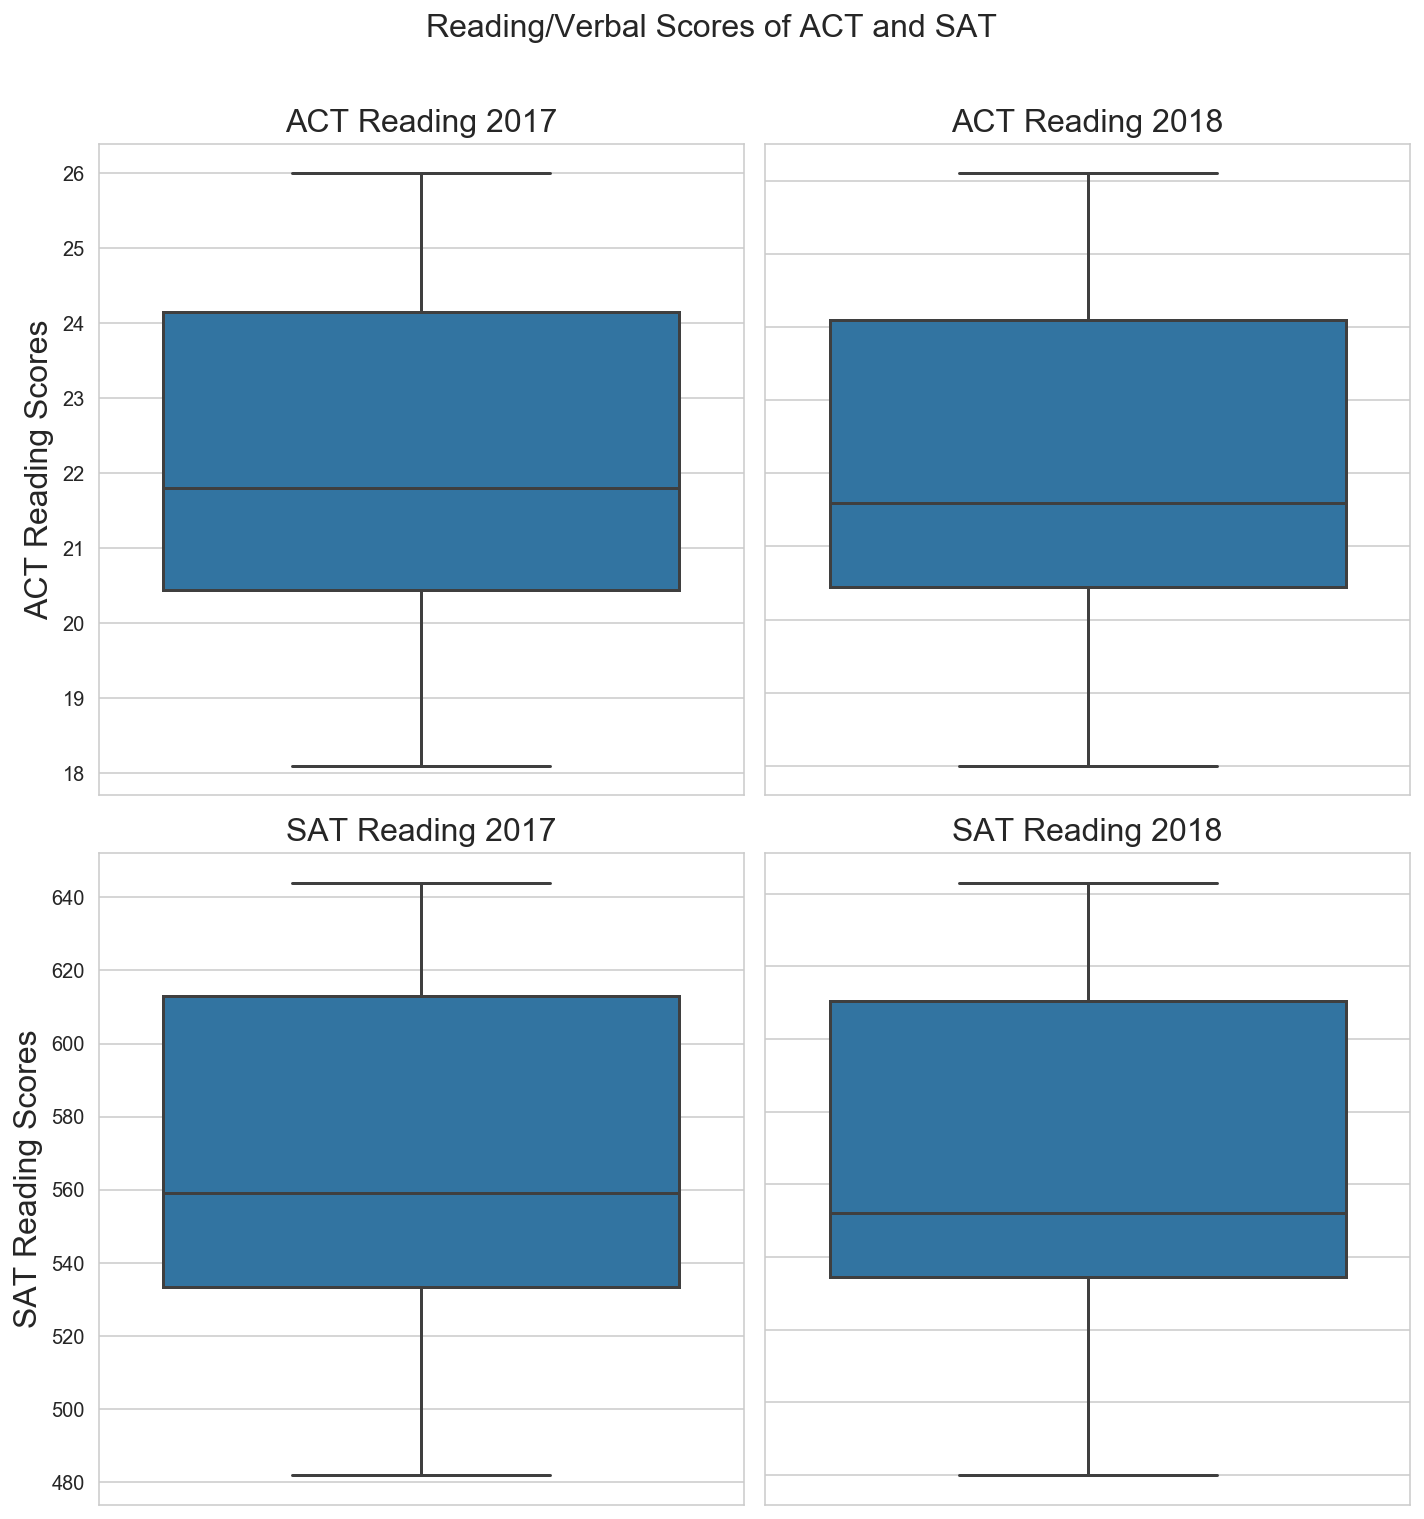

In [998]:
supertitle = 'Reading/Verbal Scores of ACT and SAT'

final_part_columns = ['ACT_Reading_2017','ACT_Reading_2018','SAT_R&W_2017','SAT_R&W_2018']
part_rate_title = ['ACT Reading 2017','ACT Reading 2018','SAT Reading 2017','SAT Reading 2018']
part_rate_ylabel = ['ACT Reading Scores','ACT Reading Scores','SAT Reading Scores','SAT Reading Scores']

sns_subplot_boxplot(final, final_part_columns,part_rate_title,part_rate_ylabel,supertitle)

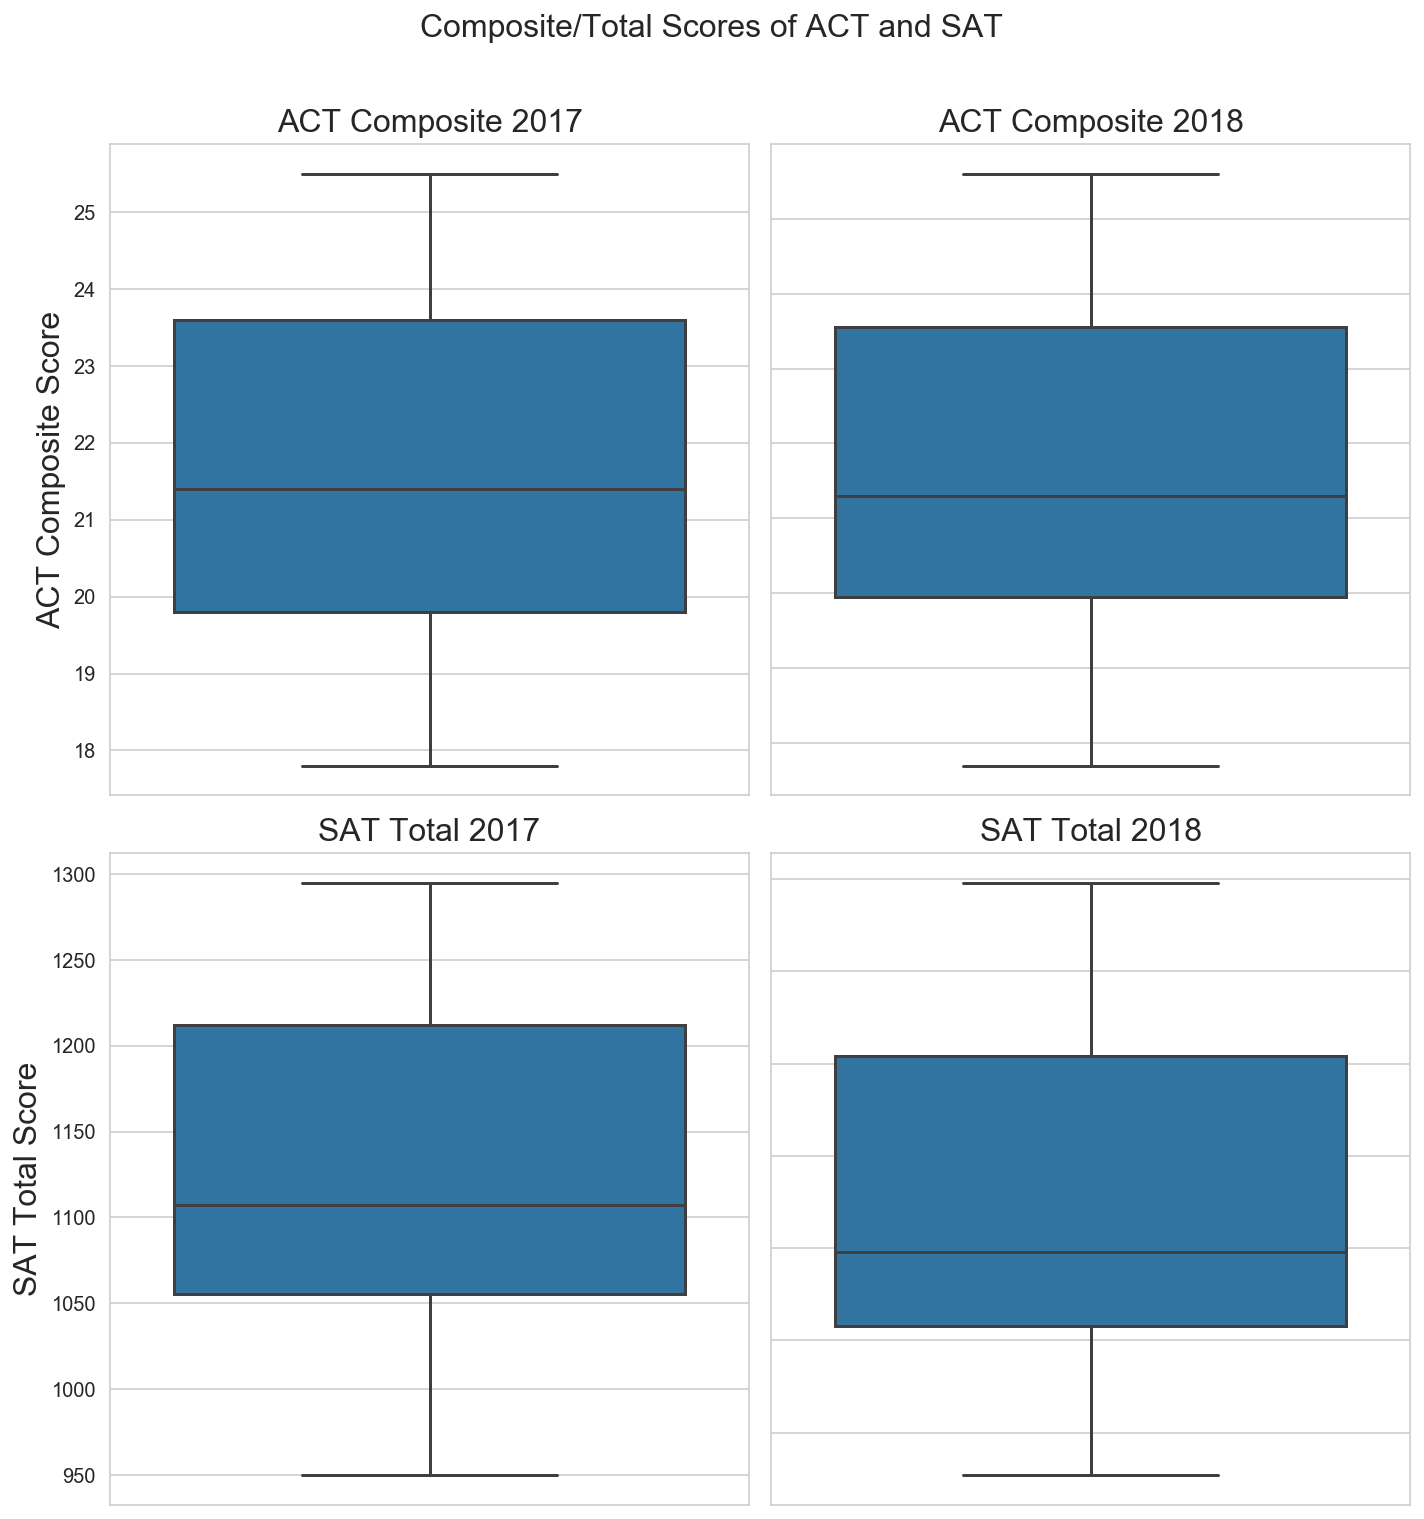

In [999]:
supertitle = 'Composite/Total Scores of ACT and SAT'

final_part_columns = ['ACT_Composite_2017','ACT_Composite_2018','SAT_Total_2017','SAT_Total_2018']
part_rate_title = ['ACT Composite 2017','ACT Composite 2018','SAT Total 2017','SAT Total 2018']
part_rate_ylabel = ['ACT Composite Score','ACT Composite Score','SAT Total Score','SAT Total Score']

sns_subplot_boxplot(final, final_part_columns,part_rate_title,part_rate_ylabel,supertitle)

From the boxplots of each subject of ACT and SAT, the distributions are relatively similar to each other. The boxplots are somewhat symmertrical in shape and the ranges do not differ from subject to subject. This suggests that both ACT and SAT were set with a level of difficulty that was able to normalise the academic standards of the students.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

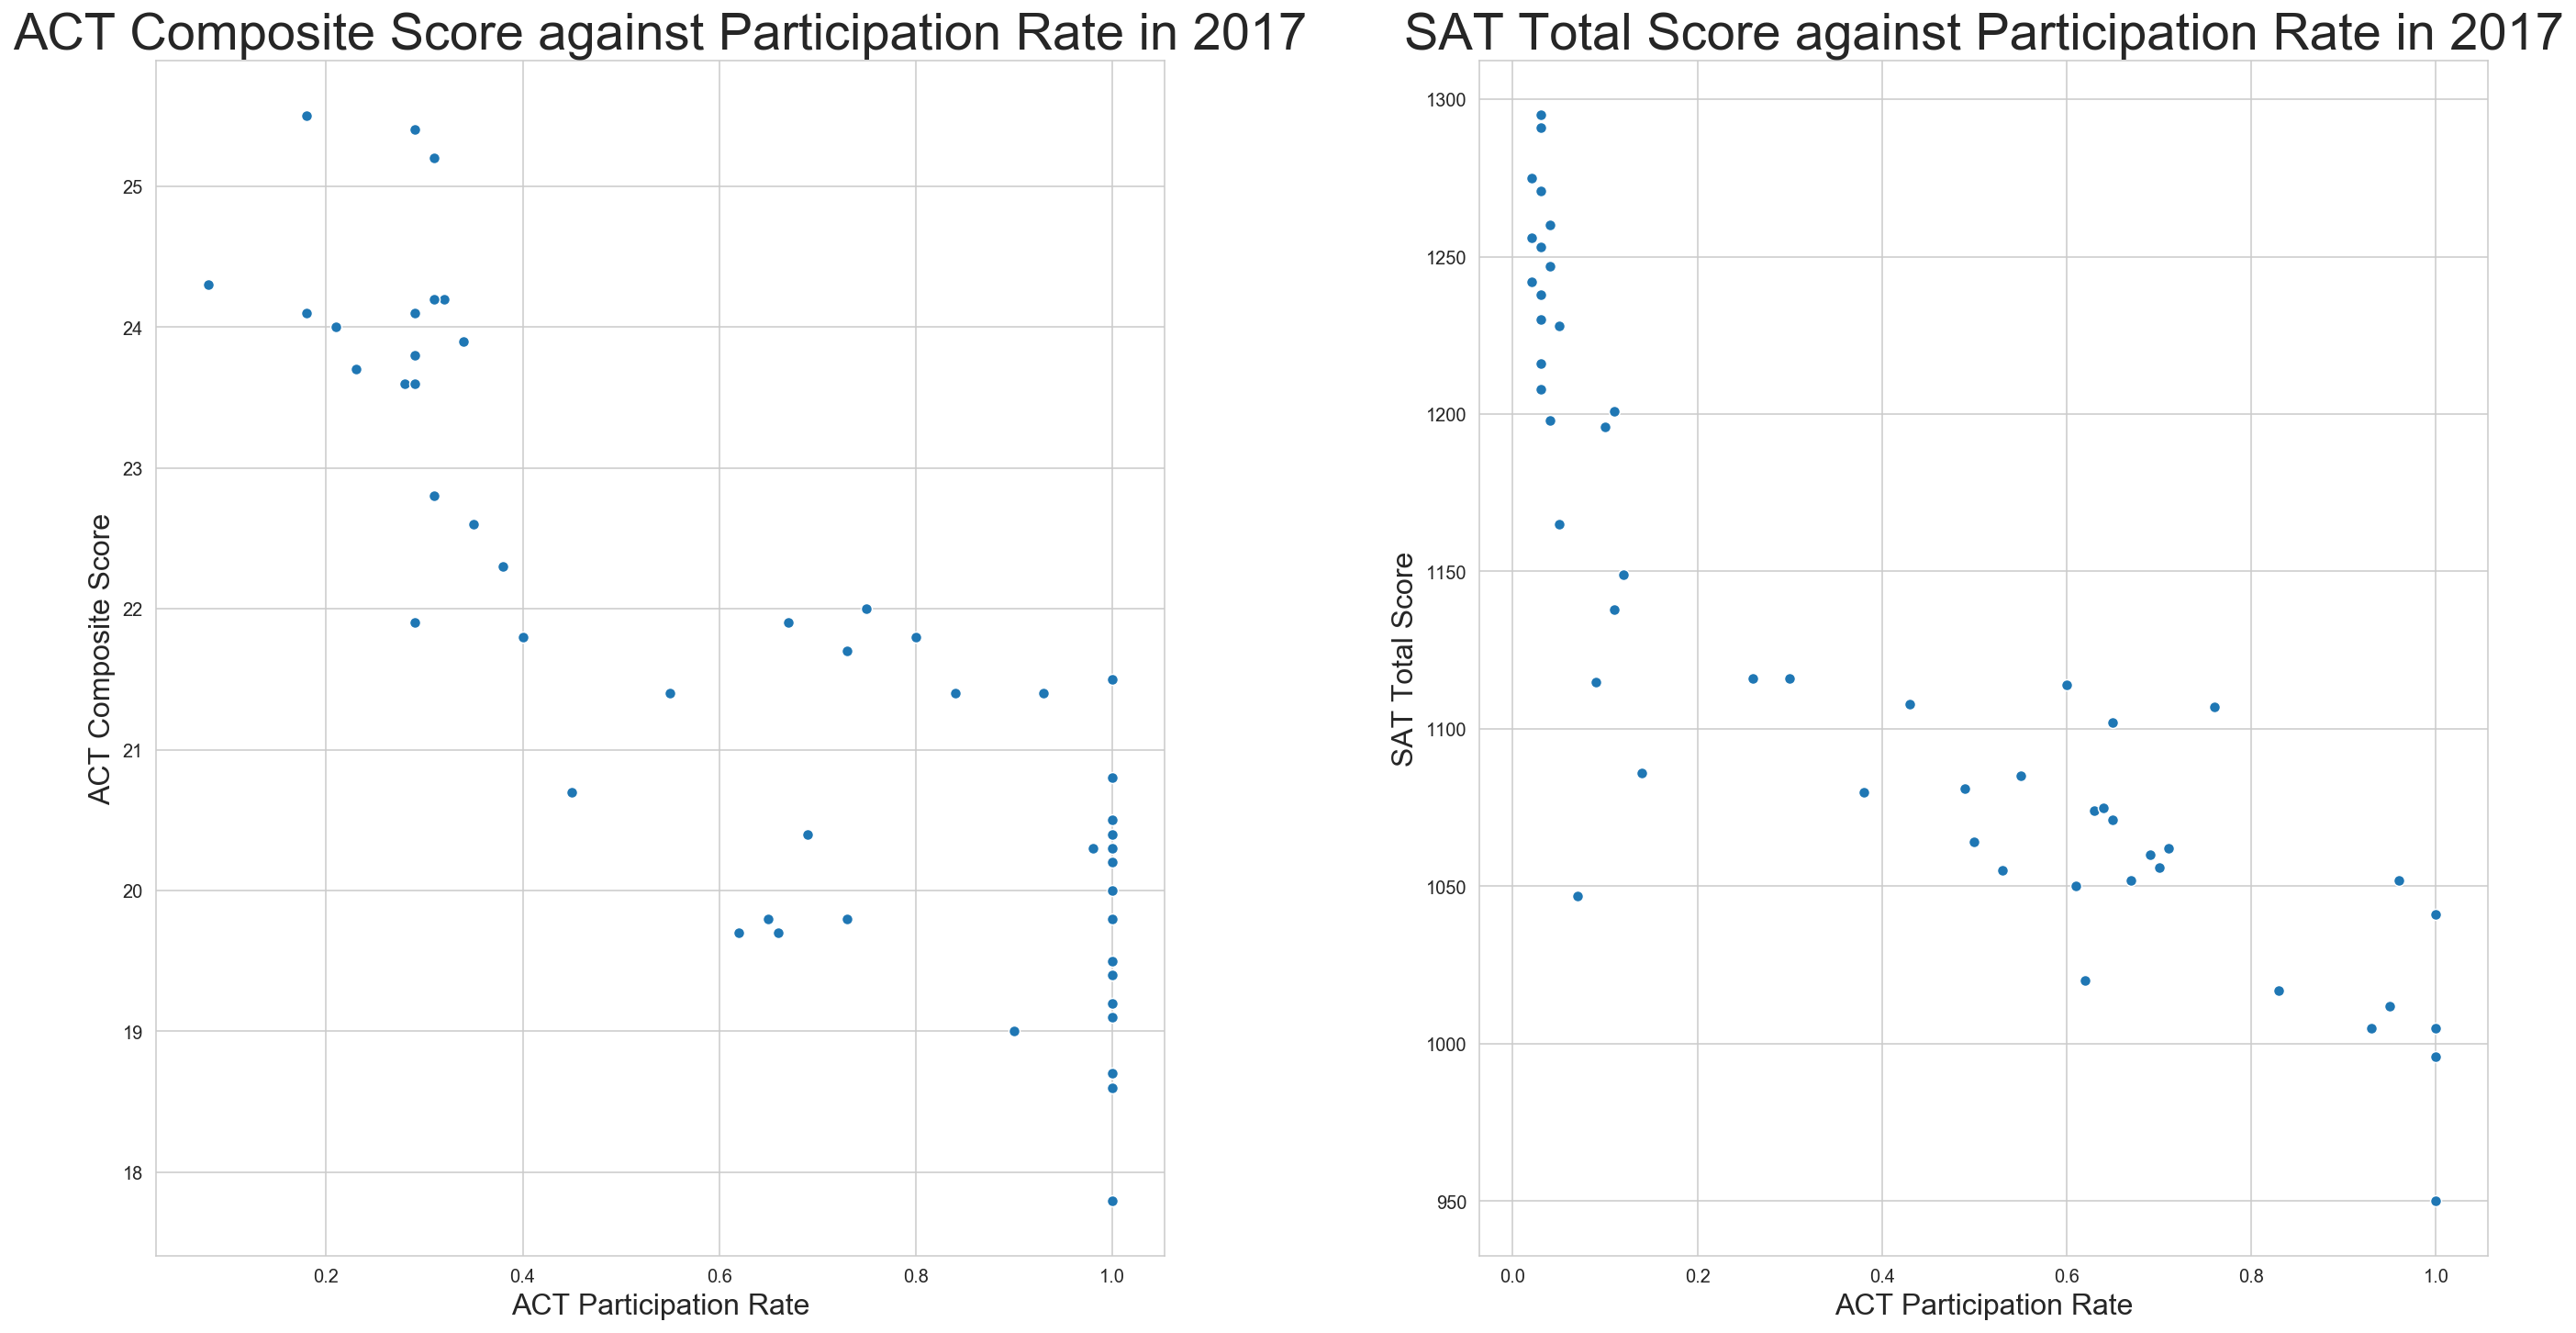

In [1000]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10)) 

sns.scatterplot(x='ACT_Participation_2017',y='ACT_Composite_2017',data=final, ax=ax1)
sns.scatterplot(x='SAT_Participation_2017',y='SAT_Total_2017',data=final, ax=ax2)

ax1.set_xlabel('ACT Participation Rate', fontsize=16)
ax1.set_ylabel('ACT Composite Score', fontsize=16)
ax1.set_title('ACT Composite Score against Participation Rate in 2017', fontsize=28)

ax2.set_xlabel('ACT Participation Rate', fontsize=16)
ax2.set_ylabel('SAT Total Score', fontsize=16)
ax2.set_title('SAT Total Score against Participation Rate in 2017', fontsize=28)

plt.tight_layout(pad=0.4, w_pad=1, h_pad=2.0)

The scatterplots above show an inverse relationship between the participation rates and test scores. As the test scores decrease, the participation rate increase. A study conducted by ACT Research & Policy team (2015) verified this phenomenon, formulating a rule of thumb whereby the "mean ACT Composite scores will decrease by 1.22 score points after adoption of the ACT for each additional 25% tested."   

As the study notes ome of the reasons that can be attributed to:  
- The composition of the state’s untested population 
- Cohort differences in academic achievement
- Substantial educational interventions which may be introduced and affect student learning and achievement.

Sources
https://www.act.org/content/dam/act/unsecured/documents/Statewide-Adoption.pdf

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

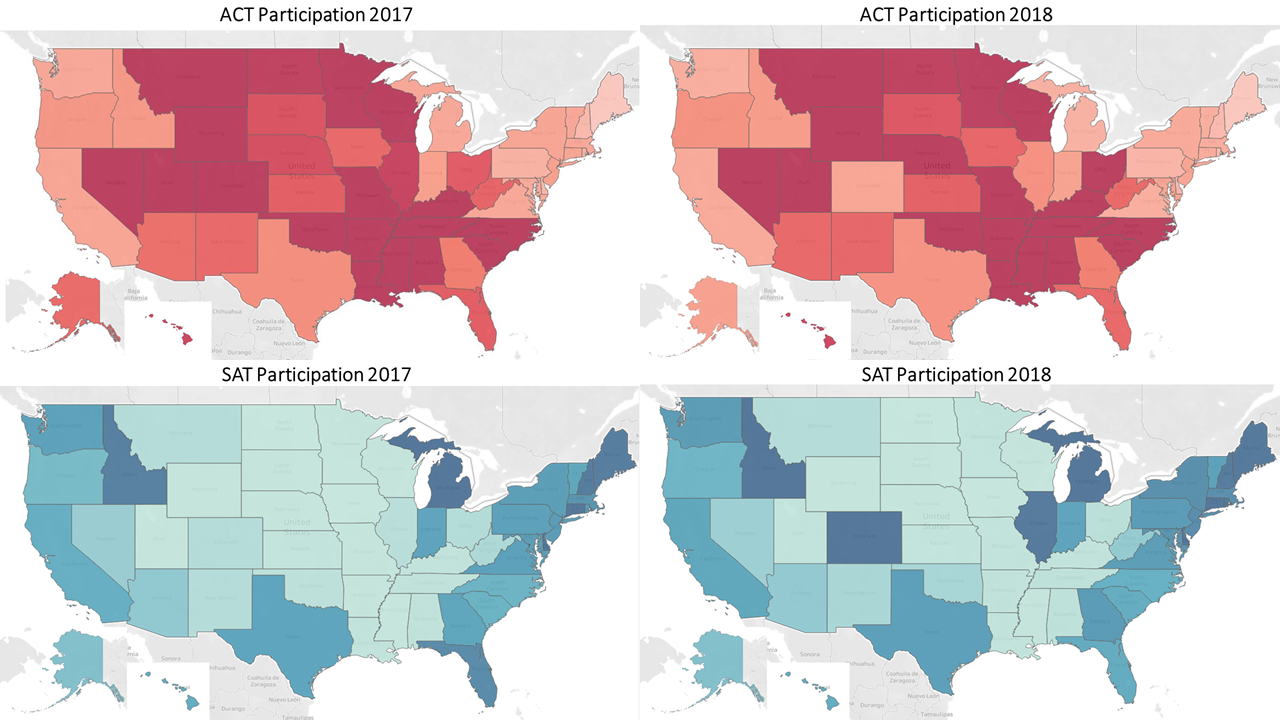

In [1032]:
from IPython.display import Image
Image("img/act_sat_part_maps.png")

It is interesting to note that states situated near costal areas tend to have higher participation for SATs, whereas states with higher participation for ACT are clustered more towards the middle. Despite ACT's seemingly high participation rates for the inland states, the coastal states are known to have denser populations, which the College Board has control of.  

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [1001]:
final[['ACT_Participation_2017','ACT_Participation_2018','SAT_Participation_2017','SAT_Participation_2018']].describe()

,ACT_Participation_2017,ACT_Participation_2018,SAT_Participation_2017,SAT_Participation_2018
count,51.000000,51.000000,51.000000,51.000000
mean,0.652549,0.616471,0.398039,0.457451
std,0.321408,0.340810,0.352766,0.373143
min,0.080000,0.070000,0.020000,0.020000
25%,0.310000,0.285000,0.040000,0.045000
50%,0.690000,0.660000,0.380000,0.520000
75%,1.000000,1.000000,0.660000,0.775000
max,1.000000,1.000000,1.000000,1.000000


**Participation Rate Statistics**  
  
ACT 2017 Mean (0.65) and Median (0.69) v.s ACT 2018 Mean (0.62) and Median (0.66)  
Little shift in central tendency 

SAT 2017 Mean (0.40) and Median (0.38) v.s SAT 2018 Mean (0.46) and Median (0.52)  
Central tendency has shifted a little to the right across the year

Standard deviation for ACT and SAT are relatively similar and considerably large (almost 30% of range). 


In [1011]:
final[['ACT_Math_2017','ACT_Math_2018','SAT_Math_2017','SAT_Math_2018']].describe()

,ACT_Math_2017,ACT_Math_2018,SAT_Math_2017,SAT_Math_2018
count,51.000000,51.000000,51.000000,51.000000
mean,21.182353,21.125490,556.882353,556.235294
std,1.981989,2.035765,47.121395,47.772623
min,18.000000,17.800000,468.000000,480.000000
25%,19.400000,19.400000,523.500000,522.500000
50%,20.900000,20.700000,548.000000,544.000000
75%,23.100000,23.150000,599.000000,593.500000
max,25.300000,25.200000,651.000000,655.000000


**Math Score Statistics**  
  
ACT 2017 Mean (21.2) and Median (20.1) v.s ACT 2018 Mean (21.1) and Median (20.7)  
Smiliar central tendency

SAT 2017 Mean (556.9) and Median (548) v.s SAT 2018 Mean (556.2) and Median (544)  
Distribution is slightly skewed towards the right. 

Standard deviation for ACT and SAT are relatively small and range is tight.  
Std for ACT around 2, with a min/max range of 18 to 25.3   
Std for SAT around 556, with a min/max range of 475 to 655

In [1013]:
final[['ACT_Reading_2017','ACT_Reading_2018','SAT_R&W_2017','SAT_R&W_2018']].describe()

,ACT_Reading_2017,ACT_Reading_2018,SAT_R&W_2017,SAT_R&W_2018
count,51.000000,51.000000,51.000000,51.000000
mean,22.013725,22.015686,569.117647,563.686275
std,2.067271,2.167245,45.666901,47.502627
min,18.100000,18.000000,482.000000,480.000000
25%,20.450000,20.450000,533.500000,534.500000
50%,21.800000,21.600000,559.000000,552.000000
75%,24.150000,24.100000,613.000000,610.500000
max,26.000000,26.100000,644.000000,643.000000


**Reading Score Statistics**  
  
ACT 2017 Mean (22.0) and Median (21.8) v.s ACT 2018 Mean (22.0) and Median (21.6)    
Smiliar central tendency

SAT 2017 Mean (569.1) and Median (559) v.s SAT 2018 Mean (563.7) and Median (552)  
Distribution is slightly skewed towards the right. 

Standard deviation for ACT and SAT are relatively small and range is tight.  
Std for ACT around 2, with a min/max range of 18 to 26   
Std for SAT around 46, with a min/max range of 480 to 644

In [1015]:
final[['ACT_English_2017','ACT_English_2018','ACT_Science_2017','ACT_Science_2018']].describe()

,ACT_English_2017,ACT_English_2018,ACT_Science_2017,ACT_Science_2018
count,51.000000,51.000000,51.000000,51.000000
mean,20.931373,20.988235,21.462745,21.345098
std,2.353677,2.446356,1.753392,1.870114
min,16.300000,16.600000,18.200000,17.900000
25%,19.000000,19.100000,19.950000,19.850000
50%,20.700000,20.200000,21.300000,21.100000
75%,23.300000,23.700000,23.200000,23.050000
max,25.500000,26.000000,24.900000,24.900000


**ACT English and Science Score Statistics**  
  
ACT English 2017 Mean (20.9) and Median (20.7) v.s ACT 2018 Mean (21.0) and Median (20.2)    
Smiliar central tendency

ACT Science 2017 Mean (21.5) and Median (21.3) v.s SAT 2018 Mean (21.3) and Median (21.1)  
Smiliar central tendency 

Standard deviation for ACT and SAT are relatively small and range is tight.  
Std for ACT English around 2.4, with a min/max range of 19 to 26   
Std for ACT Science around 1.8, with a min/max range of 18 to 25

In [1018]:
final[['ACT_Composite_2017','ACT_Composite_2018','SAT_Total_2017','SAT_Total_2018']].describe()

,ACT_Composite_2017,ACT_Composite_2018,SAT_Total_2017,SAT_Total_2018
count,51.000000,51.000000,51.000000,51.000000
mean,21.519608,21.486275,1126.098039,1120.019608
std,2.020695,2.106278,92.494812,94.155083
min,17.800000,17.700000,950.000000,977.000000
25%,19.800000,19.950000,1055.500000,1057.500000
50%,21.400000,21.300000,1107.000000,1098.000000
75%,23.600000,23.550000,1212.000000,1204.000000
max,25.500000,25.600000,1295.000000,1298.000000


**Composite/ Total Score Statistics**  
  
ACT 2017 Mean (21.5) and Median (21.4) v.s ACT 2018 Mean (21.5) and Median (21.3)    
Smiliar central tendency

SAT 2017 Mean (1126.1) and Median (1107) v.s SAT 2018 Mean (1120.0) and Median (1098)  
Distribution is slightly skewed towards the right. 

Standard deviation for ACT and SAT are relatively small and range is tight.  
Std for ACT around 2, with a min/max range of 17.7 to 25.6  
Std for SAT around 93, with a min/max range of 950 to 1300


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

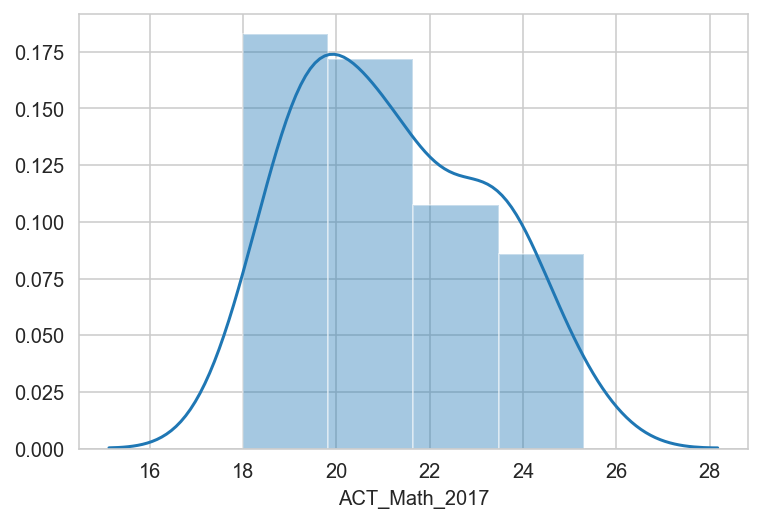

In [1002]:
sns.distplot(final['ACT_Math_2017'])

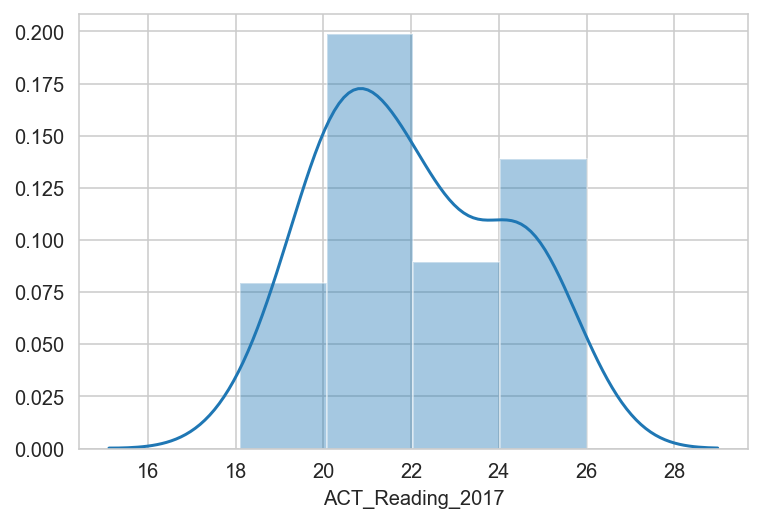

In [1003]:
sns.distplot(final['ACT_Reading_2017'])

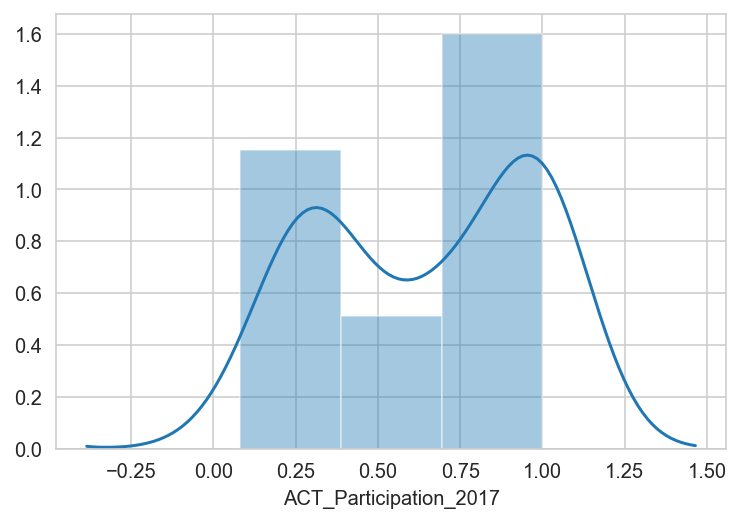

In [1004]:
sns.distplot(final['ACT_Participation_2017'])

Answer:   
No, these sampling distributions are not normal.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:  
The CLT assumption does not hold for all 3 variables. For both the Math and Reading score distrbutions, the peak slightly leans to the left. As for Participation Rates distribution, the distrbution is bimodal. 

CLT assumes that all samples are sampled randomly. However in this case, the sample means are taken directly from the state average. Thus, the sample is not truly randomized as each sample only consists of test scores from the state itself.

From the earlier scatterplot depicting the Composite/Total Scores against Participation Rate, it suggested that the scores have an inverse relationship to participation rate. A possible reason could be due to the fact that only well-prepared students choose to take the test, as opposed to statewide mandatory test which will include all students, even for students who are unstudied. Furthermore, the participation rates do not follow a normal distribution and would render CLT invalid in this case. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

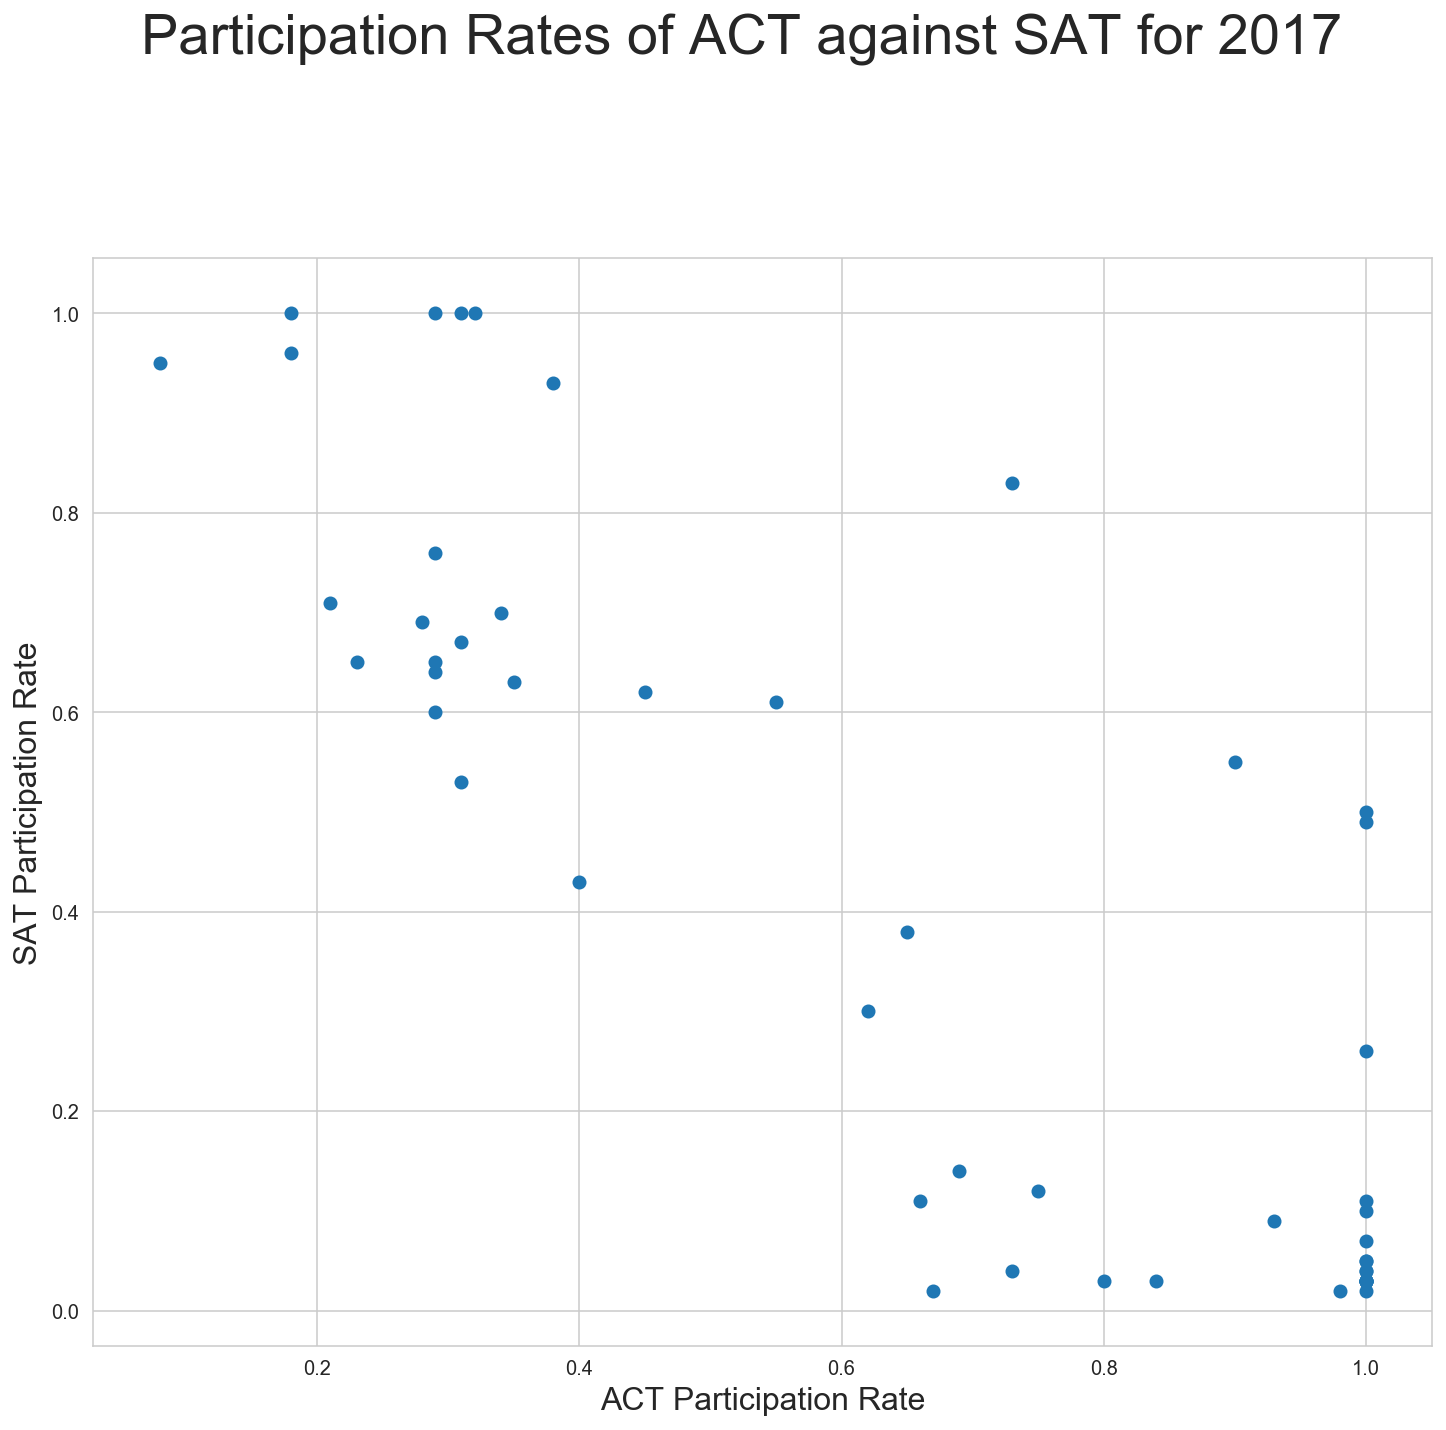

In [1005]:
title = 'Participation Rates of ACT against SAT for 2017' 
x = 'ACT_Participation_2017'
y = 'SAT_Participation_2017'
x_label = 'ACT Participation Rate'
y_label = 'SAT Participation Rate'

scatterplot(final, x, y ,title, x_label,y_label)

Answer:  
It would not make sense. The sample means on participation rates are definitely not representative of the population as a whole as the participation rates are not independent of the state from which the sample is taken from. Also, each state has a different demographic and laws that affect the participation rates, and some of these are examples of potential confounders. Running statistical inference without addressing more potential confounders would only cause the statistical findings to be biased, especially when the goal is to understand the relationship between only the test itself and the participation rate.      

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:
No. Both ACT and SAT operate on different scales: ACT using a scale of 1 to 36, SAT using a scale of 200 to 800.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

H0: There is no difference in ACT Math Test Scores for 2017 compared to 2018  
H1: There is a difference in ACT Math Test Scores for 2017 compared to 2018

In [1022]:
# Code:


ACT_Math_2017 = final['ACT_Math_2017'].to_numpy()
ACT_Math_2018 = final['ACT_Math_2018'].to_numpy()
t = stats.ttest_ind(ACT_Math_2017, ACT_Math_2018)
t.pvalue, t.statistic



(0.8866376635015419, 0.1429241656548978)

With alpha = 0.05 and p-value = 0.887, p-value is more that alpha and thus there is insufficient evidence to reject the null hypothesis.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [1007]:
final.loc[(final['State'] == 'Colorado'), ['State','ACT_Participation_2017','ACT_Participation_2018','SAT_Participation_2017','SAT_Participation_2018']]

,State,ACT_Participation_2017,ACT_Participation_2018,SAT_Participation_2017,SAT_Participation_2018
5,Colorado,1.0,0.3,0.11,1.0


In [1008]:
final.loc[(final['State'] == 'Illinois'), ['State','ACT_Participation_2017','ACT_Participation_2018','SAT_Participation_2017','SAT_Participation_2018']]

,State,ACT_Participation_2017,ACT_Participation_2018,SAT_Participation_2017,SAT_Participation_2018
13,Illinois,0.93,0.43,0.09,0.99


In [1009]:
final.loc[(final['State'] == 'Alaska'), ['State','ACT_Participation_2017','ACT_Participation_2018','SAT_Participation_2017','SAT_Participation_2018']]

,State,ACT_Participation_2017,ACT_Participation_2018,SAT_Participation_2017,SAT_Participation_2018
1,Alaska,0.65,0.33,0.38,0.43


The participation rates for both tests have reversed for the states in Colorado and Illinois. 
In Colorado, its SAT participation rate increased from 11% to 100%, whereas ACT participation rate has dropped from 100% to 70%. Likewise in Illinois,  SAT participation increased from 9% to 99%, ACT participation dropped from 93% to 43%.

The Colorado State Department of Education has instead partnered with the College Board, whom are the makers of SAT as opposed to ACT Testing company. This is due to a change which "grew out of a competitive bidding process required by hard-fought testing reform legislation." As with Illinois, the College Board won its bid to give the SAT to all public high school juniors in the state. 

In Alaska, we see that the participation rate for ACT is slashed into half, from 65% to 33%. The State Law requiring college readiness tests for high school students have expired since 2016. This meant Alaska's high school students were no longer required to take SAT or ACT to obtain their high school diplomas. This can be supplemented by the fact that the 2018 participation rates of ACT(33%) and SAT(43%) adds up to less than 100%. 

Sources:  
https://www.testive.com/colorado-sat-change-2017/  
https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/  
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html  
https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key takeaways and Recommendations
  
    
      
**Impact of State Legislations on ACT/SAT Participation Rates**  
  
Based upon observation of the data and preliminary findings, we see that the State Law and the State's Education Board play a pivotal role in participation rates of these college tests. Winning the bid to administer these college tests to high schools would certainly see a shift in participation rates for one test over the other. Furthermore, the majority of States mandate that sitting for a college readiness test is compulsory. In statistical terms, participation rates for both ACT and SAT in these states are more likely to exceed 100%, because ACT and SAT are oligopolies over other test administrators. However, there are a few states, such as Alaska, which do not mandate compulsory college tests. In those states, both ACT and SAT participation rates added together would be much lower.  


**Confounders**  
  
Through these statistical analyses, we manage to break down and identify some of the relationships of variables. However, we have to be aware of third-party variables which also affect the relationship between the independent and dependent variable. For instance, the seemingly negative correlation between the subject scores of ACT and SAT, when in theory, it should be positive. This suggests the fact that other variables may be affecting the statistical findings, such as participation rate.  


**Possible Additional Data**  
  
It would be great if we had more information on the demographics of each state. Since the data are categorised in terms of state, looking at the demographics can help to further identify potential confounders to our analyses of the data. Statistics regarding whether the test is compulsory within each state would also help to address confounding bias.


**Recommendation: Focus efforts onto Alaska**

The College Board can consider focusing their efforts onto Alaska to boost Participation Rates. With the expiration of the State Law that mandates compulsory College Readiness Tests, ACT Participation Rates have nosedived and SAT Participation Rates have increase by a slight margin. With the reduced legislation resulting in less barriers to entry for the College Board against ACT. This would be a prime opportunity the College Board to gain an edge over ACT by increasing their market share. 


*Strategy*  
  
- Marketing efforts can be focused onto Alaska to increase participation rates. With no mandatory college examination in place for Alaska, there are new potential customers left untapped that can be reached out to. 
- Continue to communicate with the State's Education Board and keep an eye out for any opportunities to rebid if the Alaskan State chooses to renew the expired legislation. 
- The College Board can consider giving subsidized or free tests in Alaska, so as to garner more interest for students who are not well versed with the SAT. 
